In [2]:
import os

os.environ[
    "OMP_NUM_THREADS"
] = "64"  # for jupyter.nersc.gov otherwise the notebook only uses 2 cores

import numpy as np

import ForSEplus
import time
from ForSEplus import my_forse_class

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rc('image', cmap='coolwarm')

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import healpy as hp
import pymaster as nmt

In [3]:
import logging
log = logging.getLogger("healpy")

log.setLevel(logging.ERROR)

# Training 

In [3]:
# training_file = '/pscratch/sd/j/jianyao/SCRATCH/ForSE/training_data_Nico_T12amin_det_U20amin_348_random_snr_1.npy'
training_file = '/pscratch/sd/j/jianyao/SCRATCH/ForSE/training_data_Nico_T12amin_sto_Q20amin_348_random_snr_1.npy'
# np.load('/pscratch/sd/j/jianyao/SCRATCH/ForSE/training_data_Nico_T12amin_U20amin_348_random_snr_1.npy')

In [4]:
# dirs = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_U_jupyter_revised/'
dirs = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_Q_jupyter_revised_sto_12_rescaled/'

# dirs = '/pscratch/sd/j/jianyao/forse_output/3_arcmin_348_models_MY_lr_5e-5_U_jupyter_revised/'
    
# dirs = '/pscratch/sd/j/jianyao/forse_output/3_arcmin_8000_models_MY_lr_5e-5_Q_jupyter/' # 20' to 3'
# dirs = '/pscratch/sd/j/jianyao/forse_output/3_arcmin_8000_models_MY_lr_5e-5_U_jupyter/' # 20' to 3'
# dirs = '/pscratch/sd/j/jianyao/forse_output/3_arcmin_from_12amin_348_models_MY_lr_5e-5_Q/' # 12' to 3'

# dirs = '/pscratch/sd/j/jianyao/forse_output/Random_12amin_MY_lr_5e-5_Q_jupyter_snr_10_extended/' # 20' to 3'
checkpoint_dir = dirs + 'training_checkpoints'

In [ ]:
test_forse = my_forse_class.forse_my(dirs)
# test_forse.build_gan()
# test_forse.check_point()
test_forse.train(epochs=200001, patches_file=training_file, batch_size=16, save_interval=500)

Training Data Shape:  (348, 320, 320, 1)


/global/common/software/nersc/pm-2022q4/sw/tensorflow/2.6.0/lib/python3.9/site-packages/keras/backend.py:4993: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


You are at epoch 499 ! Time cost is 2.42 mins! ETA: 16.15 hours!
You are at epoch 999 ! Time cost is 4.75 mins! ETA: 15.78 hours!
You are at epoch 1499 ! Time cost is 7.01 mins! ETA: 15.46 hours!
You are at epoch 1999 ! Time cost is 9.26 mins! ETA: 15.28 hours!
You are at epoch 2499 ! Time cost is 11.51 mins! ETA: 15.16 hours!
You are at epoch 2999 ! Time cost is 13.77 mins! ETA: 15.07 hours!
You are at epoch 3499 ! Time cost is 16.02 mins! ETA: 14.99 hours!
You are at epoch 3999 ! Time cost is 18.27 mins! ETA: 14.92 hours!
You are at epoch 4499 ! Time cost is 20.52 mins! ETA: 14.86 hours!
You are at epoch 4999 ! Time cost is 22.77 mins! ETA: 14.80 hours!
You are at epoch 5499 ! Time cost is 25.02 mins! ETA: 14.75 hours!
You are at epoch 5999 ! Time cost is 27.28 mins! ETA: 14.70 hours!
You are at epoch 6499 ! Time cost is 29.53 mins! ETA: 14.66 hours!
You are at epoch 6999 ! Time cost is 31.79 mins! ETA: 14.61 hours!
You are at epoch 7499 ! Time cost is 34.05 mins! ETA: 14.57 hours!
Y

# pick the best epoch

In [10]:
import check_model
from importlib import reload
reload(check_model)

<module 'check_model' from '/global/u2/j/jianyao/ForSEplus_github/src/ForSEplus/check_model.py'>

In [12]:
from check_model import get_MFs_fix, plot_MF

{246, 0.740} {231, 0.667}
[0.79 0.74 0.69] [0.64 0.69 0.67]


NameError: name 'plot_MF' is not defined

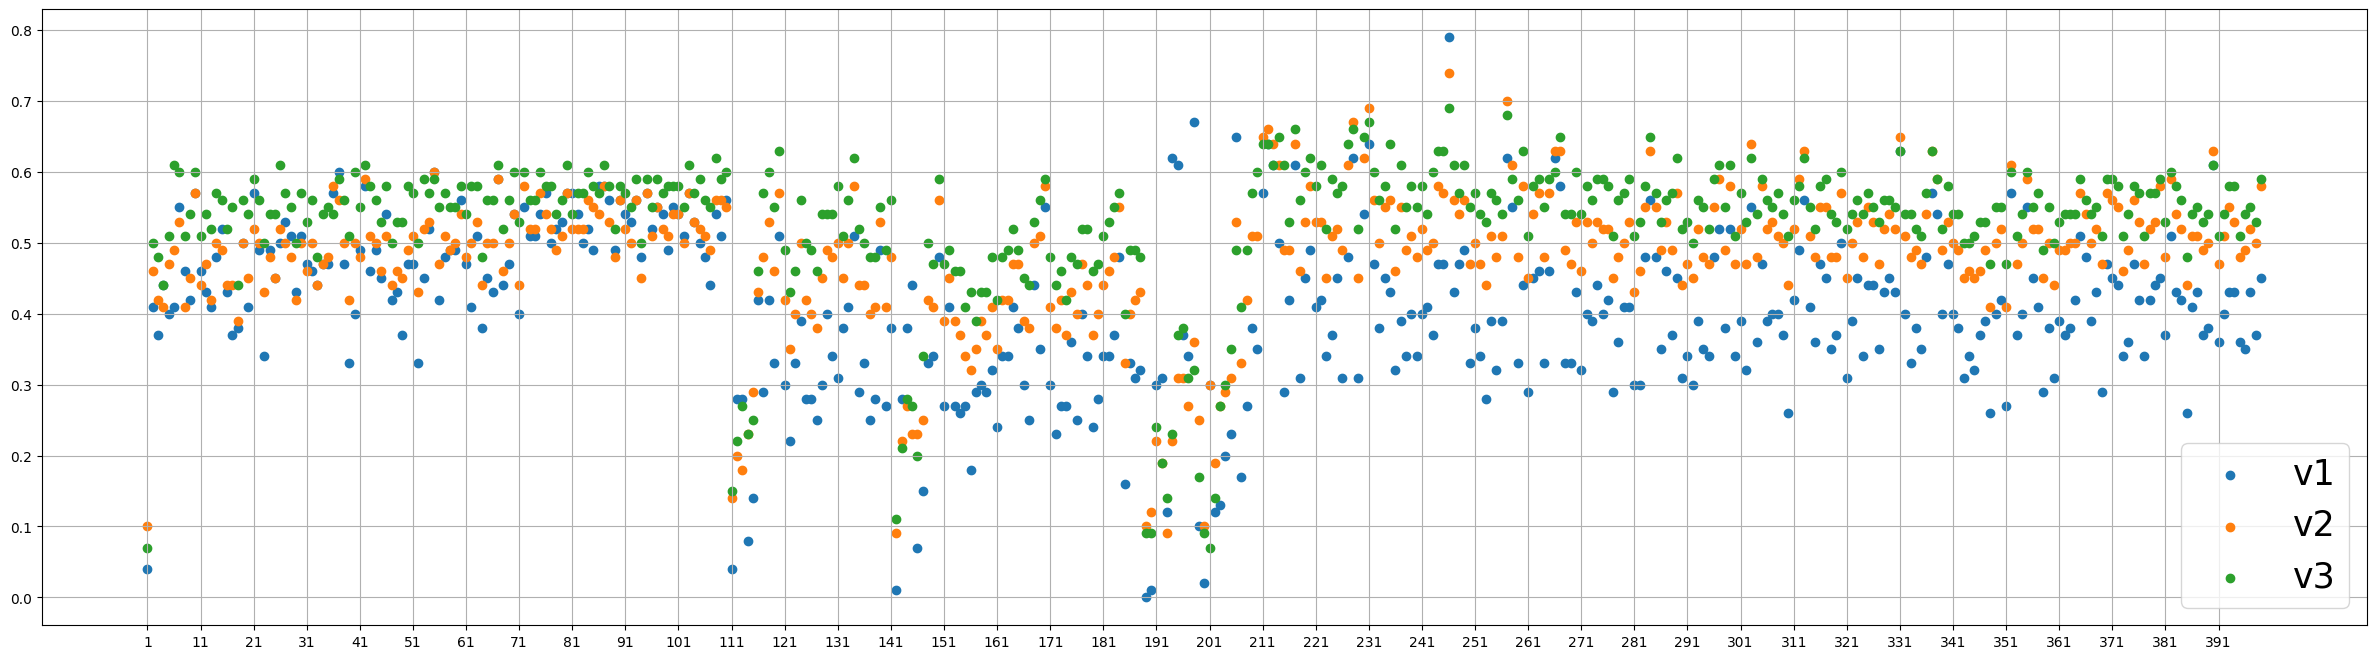

In [11]:
data_dir = '/pscratch/sd/j/jianyao/SCRATCH/ForSE/training_data_Nico_T12amin_Q20amin_348_random_snr_1.npy'
MF_dir = '/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Random_random_3_arcmin_MY_Q_jupyter_348_MFs_lr_5e-5_snr_1.txt'
model_dir = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_Q_jupyter_revised/'
results = get_MFs_fix(input_patches=348, data_dir = data_dir, model_dir = model_dir, MF_dir = MF_dir, checkpoint=test_forse.checkpoint)


/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_020.txt
{246, 0.707} {212, 0.660}
[0.72 0.72 0.68] [0.65 0.67 0.66]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_050.txt
{246, 0.687} {212, 0.643}
[0.69 0.71 0.66] [0.6  0.66 0.67]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_080.txt
{246, 0.710} {212, 0.647}
[0.72 0.73 0.68] [0.61 0.66 0.67]


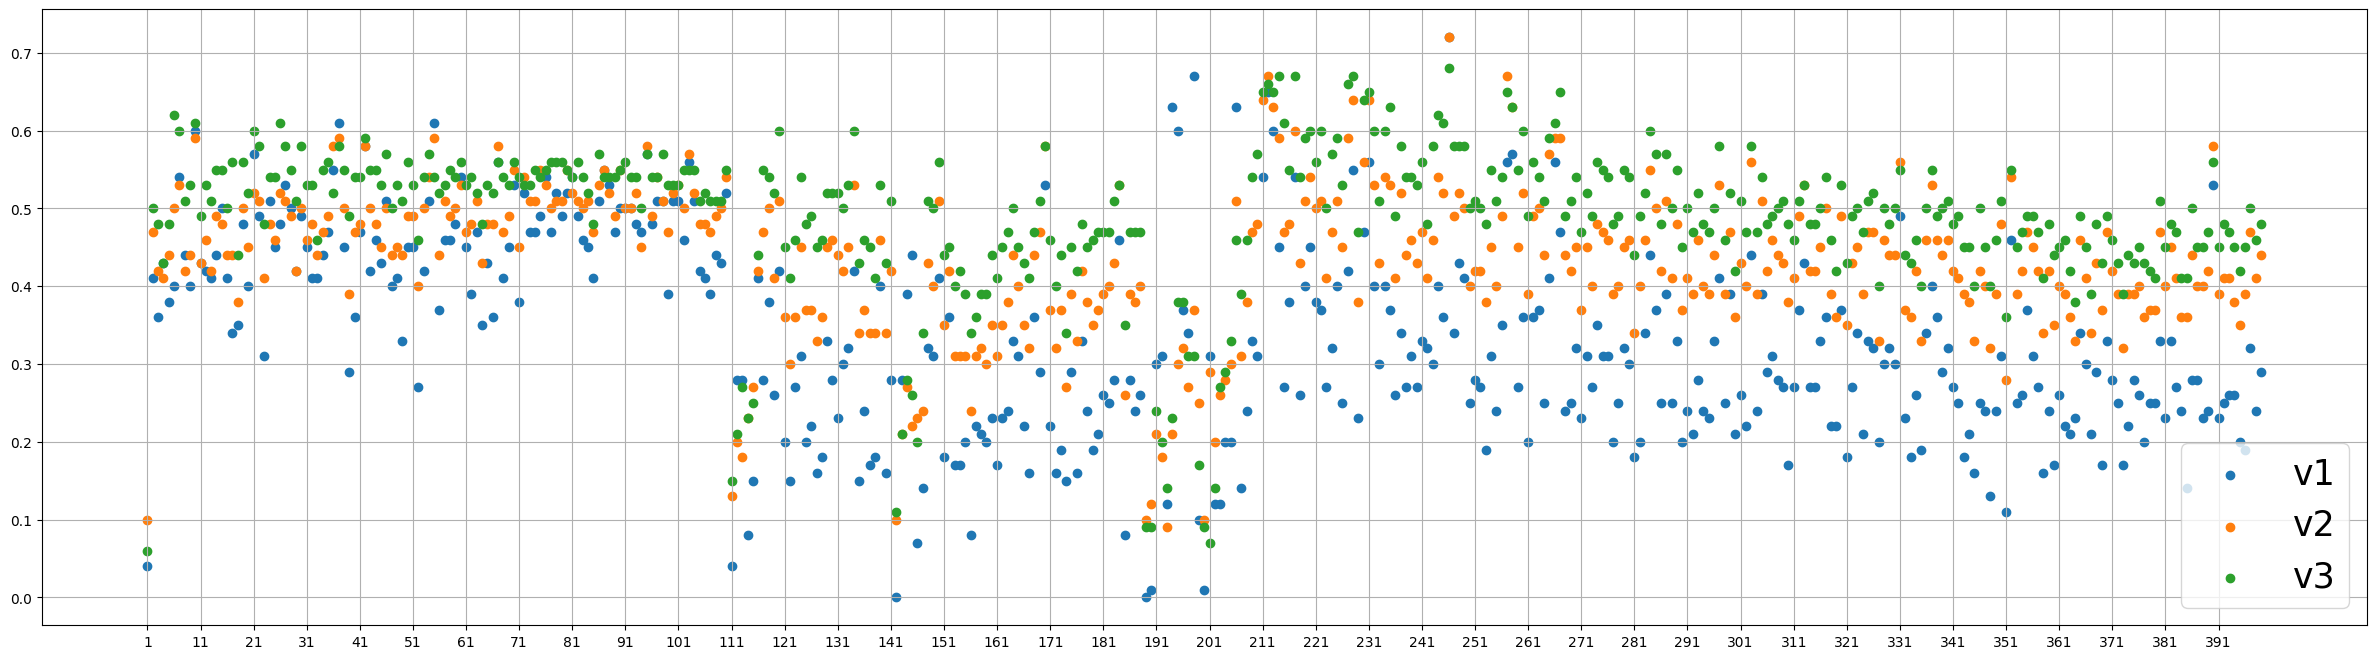

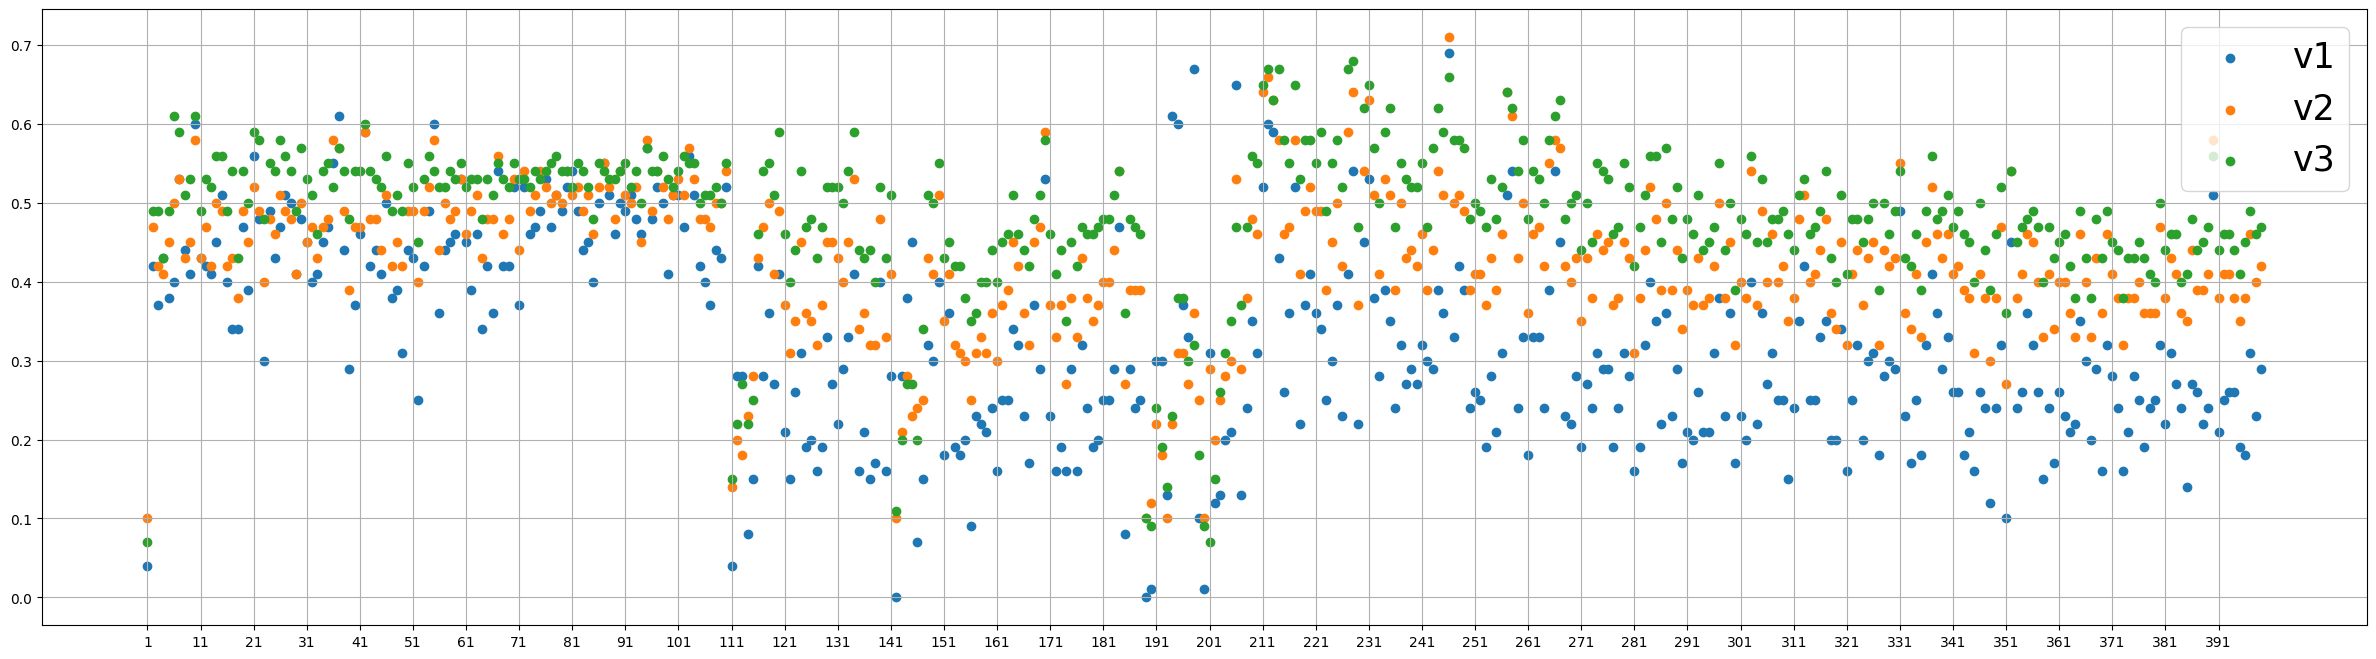

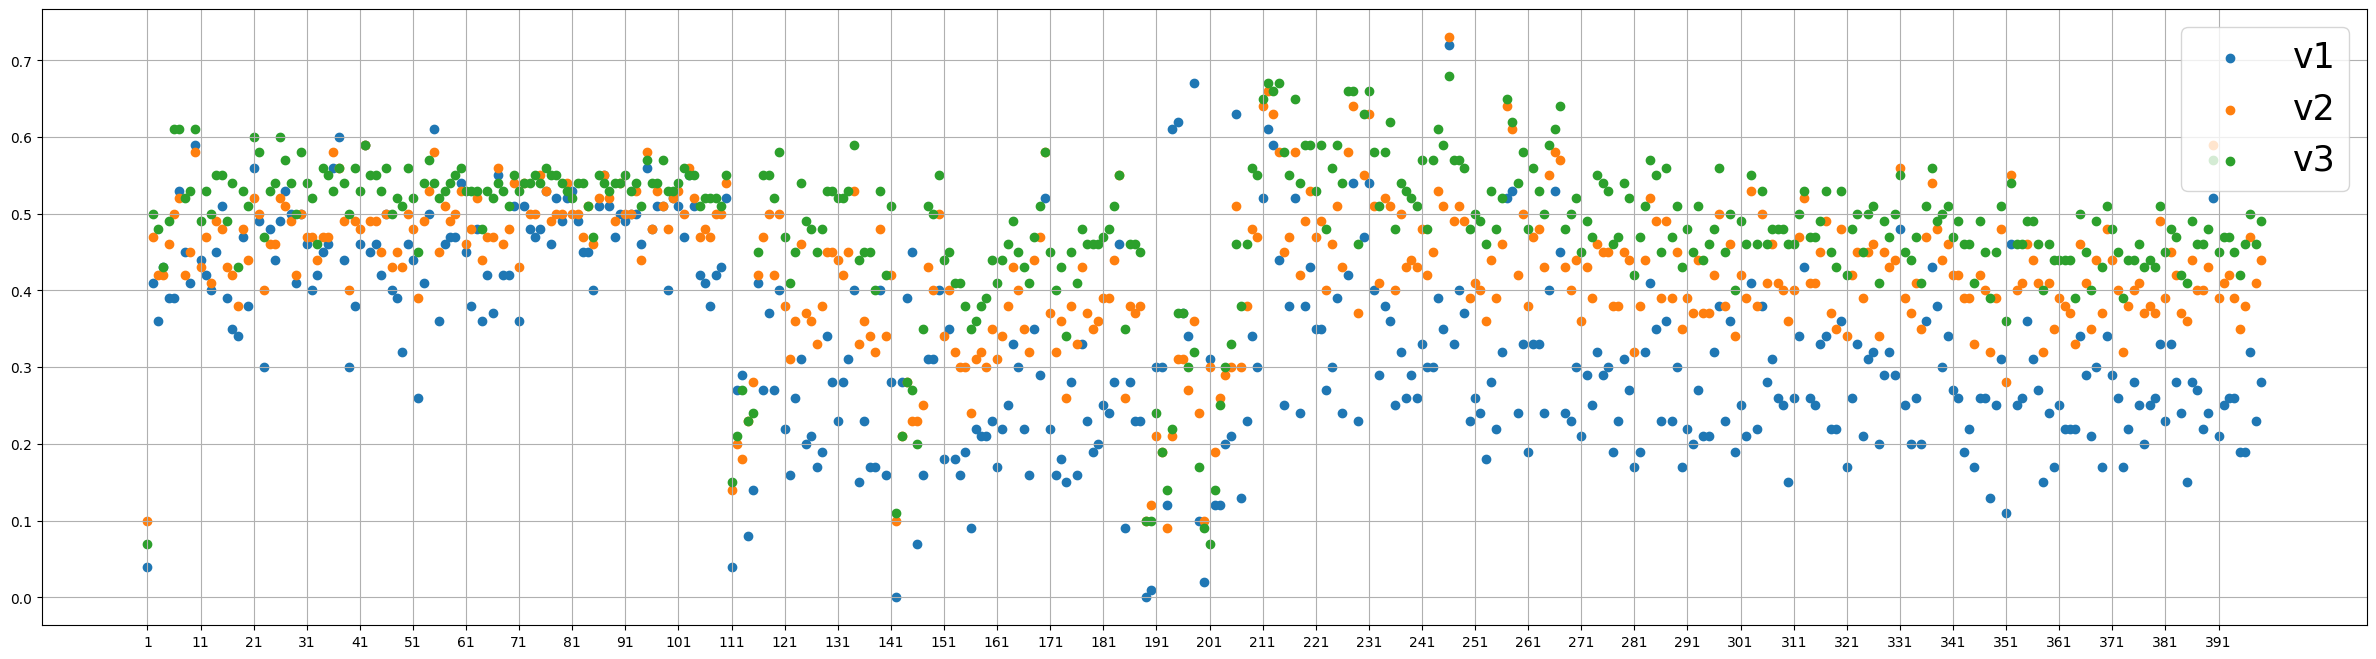

In [18]:
dir_name = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/Random_snr_1_3amin/'  
model_dir = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_Q_jupyter_revised/'
MF_dir = '/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/'
for n in range(20, 90, 30):
    MFs = MF_dir + 'Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_%03d.txt'%(n);
    print(MFs)
    test_data = np.load(dir_name + 'testing_data_Nico_T12amin_Q20amin_348_random_snr_1_%03d.npy'%n) 
    # run with previous data with [348, 320, 320], should run with [8526, 320, 320] 2023/05/29

    results = get_MFs_fix(input_patches=348, data_dir = test_data, model_dir = model_dir, MF_dir = MFs, checkpoint=test_forse.checkpoint)
    # plot_MF(results, titles[k], savedir = False)

/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_020.txt
{28, 0.660} {123, 0.650}
[0.67 0.67 0.64] [0.64 0.65 0.66]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_050.txt
{28, 0.643} {175, 0.640}
[0.65 0.65 0.63] [0.64 0.65 0.63]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_080.txt
{28, 0.650} {123, 0.640}
[0.66 0.67 0.62] [0.64 0.65 0.63]


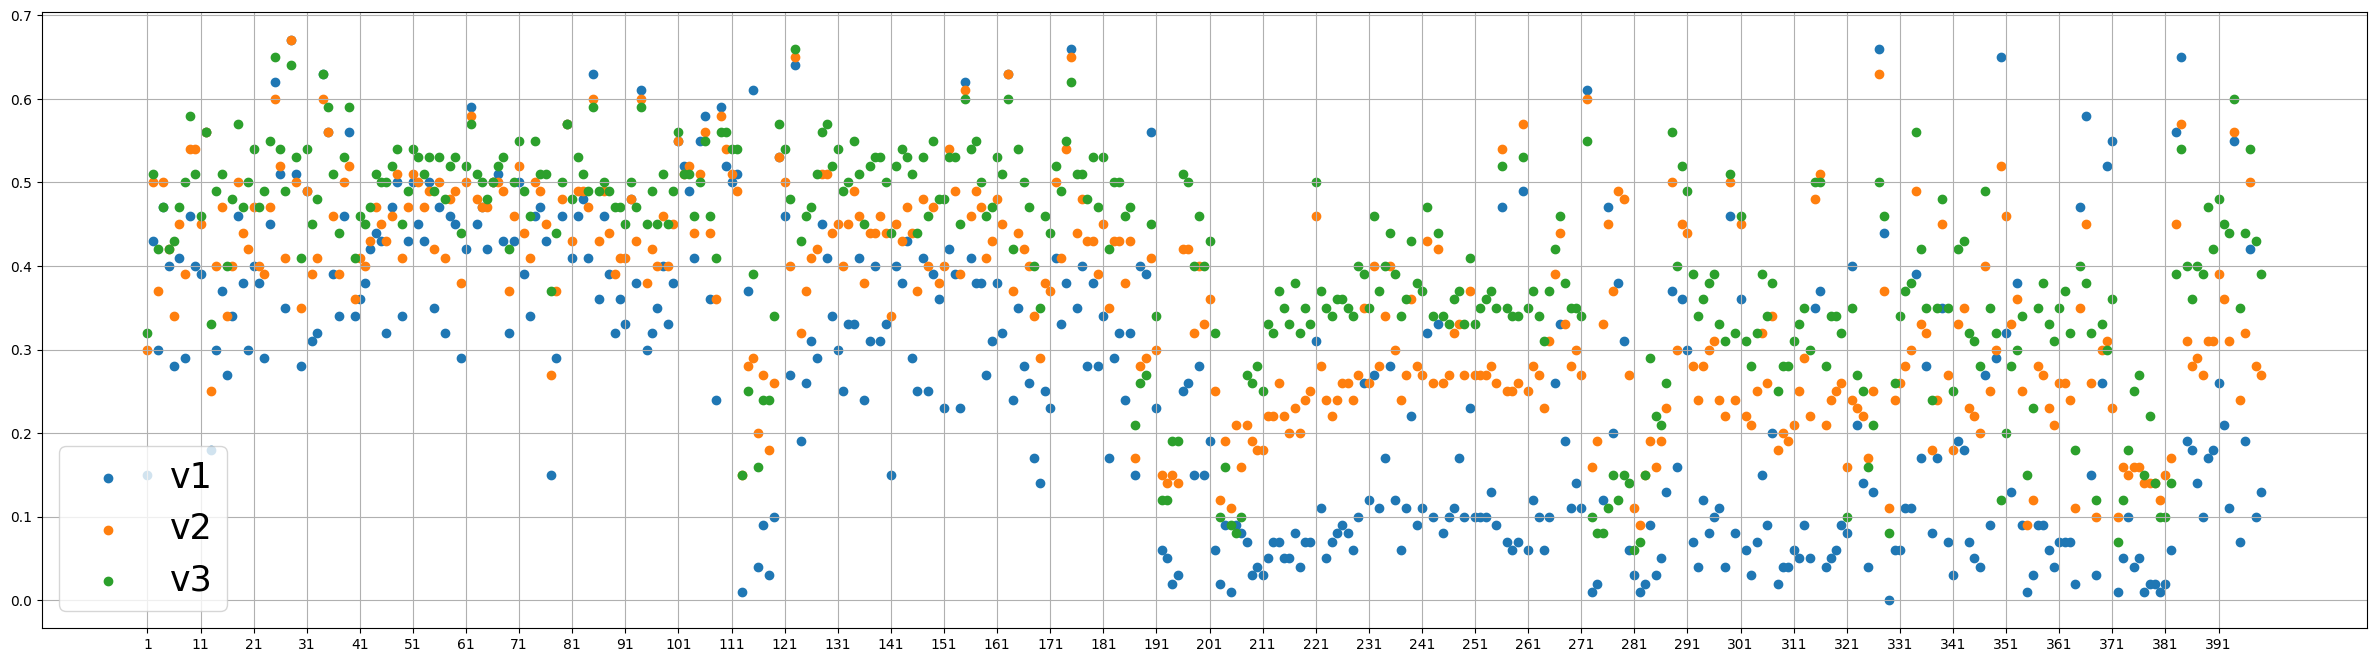

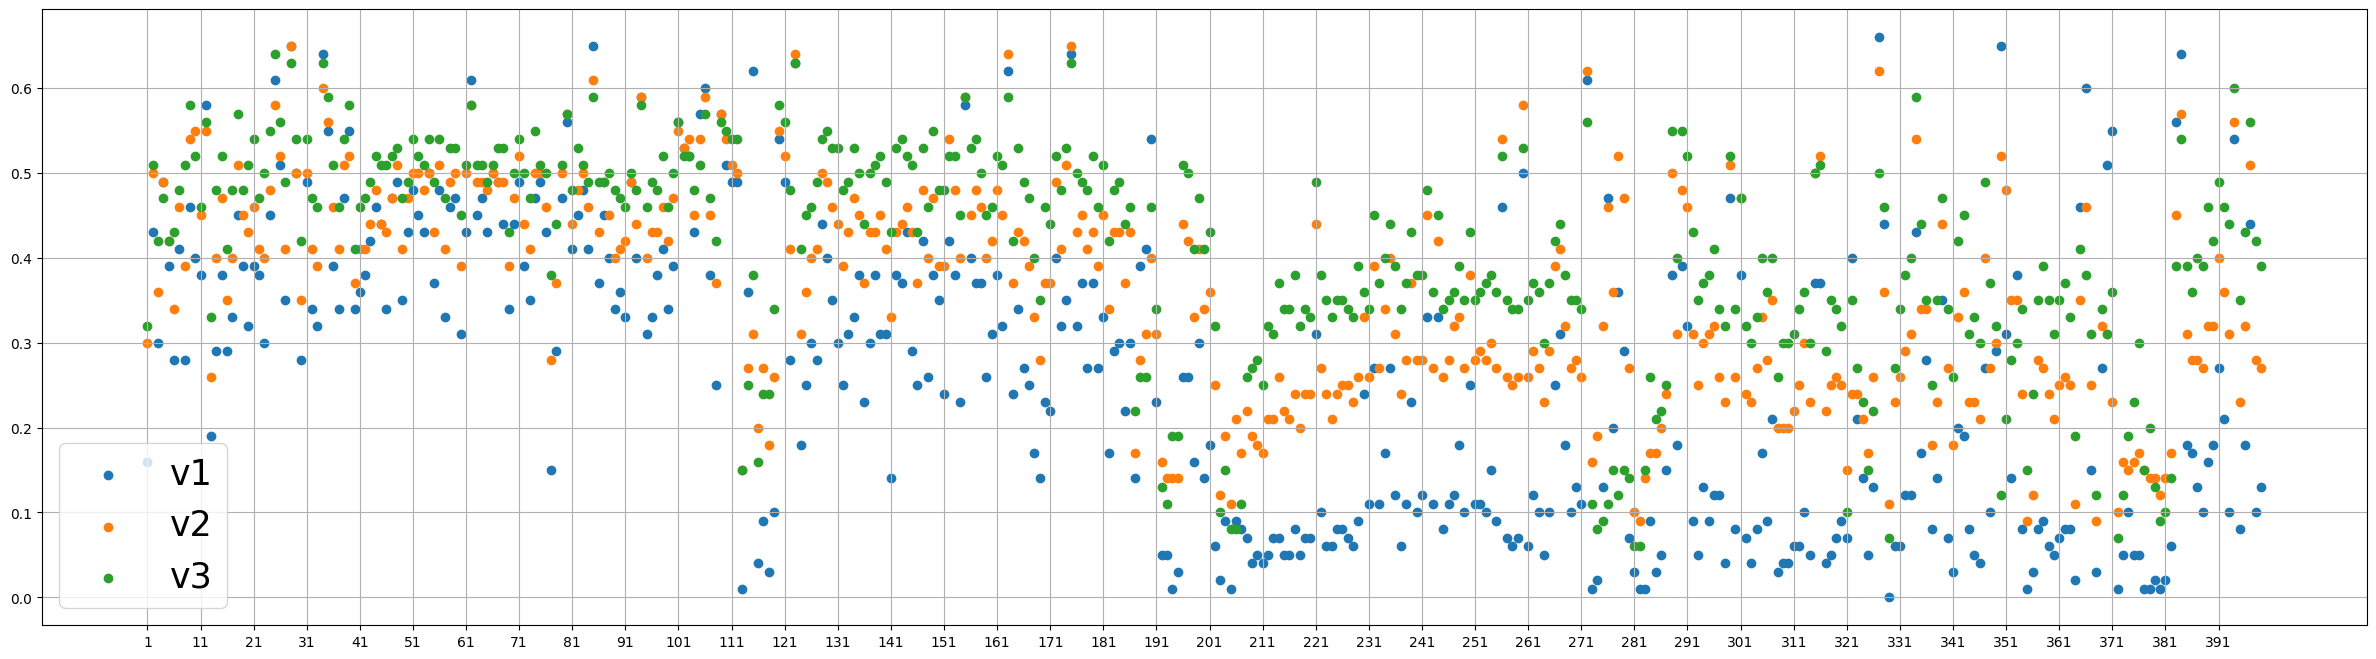

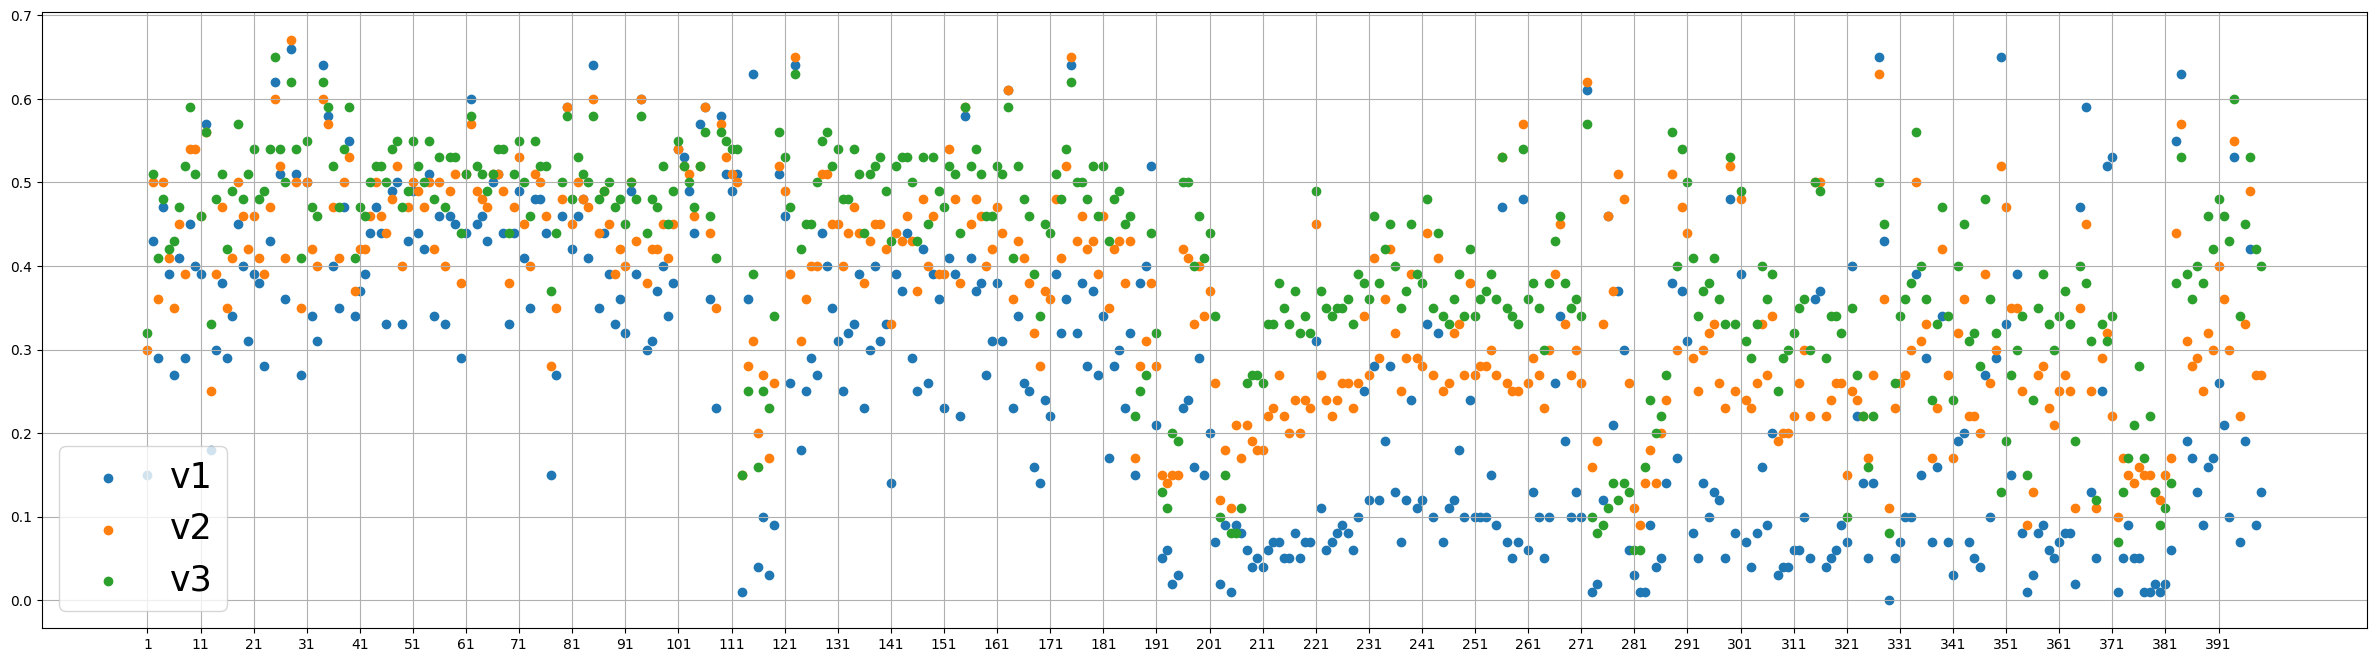

In [19]:
dir_name = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/Random_snr_1_3amin/'  
model_dir = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_U_jupyter_revised/'
MF_dir = '/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/'
for n in range(20, 90, 30):
    MFs = MF_dir + 'Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_%03d.txt'%(n);
    print(MFs)
    test_data = np.load(dir_name + 'testing_data_Nico_T12amin_U20amin_348_random_snr_1_%03d.npy'%n)

    results = get_MFs_fix(input_patches=348, data_dir = test_data, model_dir = model_dir, MF_dir = MFs, checkpoint=test_forse.checkpoint)
    # plot_MF(results, titles[k], savedir = False)

In [21]:
for n in range(20, 90, 30):
    MFs = MF_dir + 'Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_%03d.txt'%(n);
    print(MFs)

    data = np.loadtxt(MFs)
    mf_mean = np.mean(data[:, 1:4], axis = 1)
    index = np.argsort(mf_mean)[::-1]+1
    print(index[:10])

/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_020.txt
[246 212 257 213 228 231 258 211 217  10]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_050.txt
[246 212 228 213 211 231  10 257  42 258]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_Q_jupyter_with_seed_080.txt
[246 212 213 228 231 211 257  10  42 258]


In [20]:
for n in range(20, 90, 30):
    MFs = MF_dir + 'Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_%03d.txt'%(n);
    print(MFs)

    data = np.loadtxt(MFs)
    mf_mean = np.mean(data[:, 1:4], axis = 1)
    index = np.argsort(mf_mean)[::-1]+1
    print(index[:10])

/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_020.txt
[ 28 123 175  25 163  34 155  85  94 327]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_050.txt
[ 28 175 123  34 163  85  25 272 327  62]
/global/homes/j/jianyao/Small_Scale_Foreground/MFs/FIX_MF/random_3amin/Test_Random_random_3_arcmin_MY_U_jupyter_with_seed_080.txt
[ 28 123 175  25  34  85 163 272 327  94]


# Test the best model

In [11]:
from ForSEplus import recompose_class
from ForSEplus import after_training_3amin as at3
from ForSEplus import utility, validation_class

In [47]:
from importlib import reload
reload(ForSEplus.utility)
reload(ForSEplus.after_training_3amin)

<module 'ForSEplus.after_training_3amin' from '/global/u2/j/jianyao/ForSEplus_github/src/ForSEplus/after_training_3amin.py'>

In [8]:
# test_forse.generator.save('/pscratch/sd/j/jianyao/forse_output/Random_model_PySM/model_3amin_h5_10U_2', save_format='h5')

In [12]:
def rescale_input(Ls):
    Ls_rescaled = np.zeros_like(Ls)
    for i in range(Ls.shape[0]):
            Ls_rescaled[i] = utility.rescale_min_max(Ls[i])
    Ls_rescaled = Ls_rescaled.reshape((Ls.shape[0], Ls.shape[1], Ls.shape[1], 1)) 
    return Ls_rescaled

dir_data = '/global/cfs/cdirs/sobs/www/users/ForSE/NN_datautils/datasets/'
# ss_I = np.load(dir_data+'GNILC_Thr12_Qlr80_20x20deg_Npix320_full_sky_adaptive.npy', allow_pickle=True)[0, 0:174]

ss_I = np.load(dir_data+'GNILC_Thr12_Qlr80_20x20deg_Npix320_full_sky_adaptive.npy', allow_pickle=True)[0, 0:348]

# Ls_Q80amin = np.load(dir_data + 'GNILC_Thr12_Qlr80_20x20deg_Npix320_full_sky_adaptive.npy', allow_pickle=True)[1, 0:174]*1e6
# Ls_U80amin = np.load(dir_data + 'GNILC_Thr12_Ulr80_20x20deg_Npix320_full_sky_adaptive.npy', allow_pickle=True)[1, 0:174]*1e6

gauss_ss_ps_12 = np.load('/pscratch/sd/j/jianyao/forse_output/gauss_small_scales_12_over_80_power_spectra.npy') #[2, 174, 49, 1, 25] Q, U
gauss_ss_mean_std_12 = np.load('/pscratch/sd/j/jianyao/forse_output/gauss_small_scales_12_over_80_mean_and_std.npy') #[4, 174, 49] Q_mean, Q_std, U_mean, U_std

gauss_ss_ps_3 = np.load('/pscratch/sd/j/jianyao/forse_output/gauss_small_scales_3_over_20_power_spectra_lmax_3500.npy') #[2, 174, 49, 1, 25] Q, U
gauss_ss_mean_std_3 = np.load('/pscratch/sd/j/jianyao/forse_output/gauss_small_scales_3_over_20_mean_and_std.npy') #[4, 174, 49] Q_mean, Q_std, U_mean, U_std

# ori_train_Q = np.load('/global/cfs/cdirs/sobs/www/users/ForSE/NN_datautils/datasets/GNILC_Thr12_Qlr80_20x20deg_Npix320_full_sky_adaptive.npy')[1, 0:174]
# ori_train_U = np.load('/global/cfs/cdirs/sobs/www/users/ForSE/NN_datautils/datasets/GNILC_Thr12_Ulr80_20x20deg_Npix320_full_sky_adaptive.npy')[1, 0:174]

In [25]:
Ls_13aminQ = np.load('/pscratch/sd/j/jianyao/SCRATCH/ForSE/NNout_Q_physical_units_13amin_from_Nico_notebook_cori_8526.npy')
Ls_13aminU = np.load('/pscratch/sd/j/jianyao/SCRATCH/ForSE/NNout_U_physical_units_13amin_from_Nico_notebook_cori_8526.npy')

In [14]:
maps_sub_20Q = np.load('/pscratch/sd/j/jianyao/SCRATCH/ForSE/NNout_Q_physical_units_20amin_from_Nico_notebook_cori.npy')
maps_sub_20U = np.load('/pscratch/sd/j/jianyao/SCRATCH/ForSE/NNout_U_physical_units_20amin_from_Nico_notebook_cori.npy')

## test one patch!

In [4]:
def flat_ps(maps, lmax, mask_path, w22_file, side_length = 20):
    mask = np.load(mask_path)
    l0_bins = np.arange(20, lmax, 40); lf_bins = np.arange(20, lmax, 40)+39
    b = nmt.NmtBinFlat(l0_bins, lf_bins)
    ells_uncoupled = b.get_effective_ells()
    w22 = nmt.NmtWorkspaceFlat()
    
    Lx = np.radians(side_length); Ly = np.radians(side_length)   
    f_NN = nmt.NmtFieldFlat(Lx, Ly, mask, [maps[0], maps[1]], purify_b=False)
    
    try:
        w22.read_from(w22_file)
        
    except:
        w22.compute_coupling_matrix(f_NN, f_NN, b)
        w22.write_to(w22_file) 
        print('weights writing to disk')

    cl_NN_coupled = nmt.compute_coupled_cell_flat(f_NN, f_NN, b)
    cl_NN_uncoupled = w22.decouple_cell(cl_NN_coupled)
    
    return ells_uncoupled, cl_NN_uncoupled
def get_cov(cls_all, lmax):
    
    '''
    cls_all: list, including the power spectra from namaster of all the realizations; in the shape of (N_sam, 4, N_ell)
    '''
    N_sam = len(cls_all[0])
    N_ell = lmax//40 #len(cls_all[0][0][0])
    
    print(N_sam, N_ell)
    cls_EE = np.zeros((N_sam, N_ell))
    cls_BB = np.zeros((N_sam, N_ell))
    
    for i in range(N_sam):
        cls_EE[i] = cls_all[0][i][0][0:N_ell]
        cls_BB[i] = cls_all[0][i][3][0:N_ell]

    corr_EE = np.corrcoef(cls_EE.T)
    corr_BB = np.corrcoef(cls_BB.T)

    fig, axes = plt.subplots(1, 2, figsize = (10, 8))
    axes[0].imshow(corr_EE)
    axes[1].imshow(corr_BB)

    axes[0].set_xticks((0, 10, 20))
    axes[0].set_yticks((0, 10, 20))

    axes[0].set_xticklabels((0, 400, 800), fontsize = 12)   
    axes[0].set_yticklabels((0, 400, 800), fontsize = 12)   

    axes[1].set_xticks((0, 10, 20))
    axes[1].set_yticks((0, 10, 20))
    axes[1].set_xticklabels((0, 400, 800), fontsize = 12)   
    axes[1].set_yticklabels((None, None, None), fontsize = 12)  

    axes[0].set_title('EE')
    axes[1].set_title('BB')

def get_cls_patches(test_forse, reso = '12', j_range = np.arange(3), i_range = np.arange(100), only_one = True, patch_id = 33):
    
    s = time.time()
    cls_NN = [];
    if only_one:
        N = 0
    else:
        N = 33
    if reso == '3':
        lmax = 3000
        w22_file = "w22_flat_1280_1280_lmax3000_no_purifyB.fits"
        mask_path = './src/ForSEplus/mask_1280x1280.npy'
    
        for j in j_range:
            cls_NN_j = []
            
            for i in i_range:
                # print(patch_id)
                data_Q, data_U = get_3amin_20by20(test_forse = test_forse, index = i, only_one = only_one, patch_id = patch_id)

                ells_uncoupled, cls_NN_i = flat_ps(maps = [data_Q[N], data_U[N]], lmax = lmax, w22_file = w22_file, mask_path = mask_path)
                cls_NN_j.append(cls_NN_i)
                
                # if i != 0 and i%100 == 0:
                #     e = time.time()
                #     print('Averate time cost for each realization is %s mins'%((e-s)/60/(i+1)))

            cls_NN.append(cls_NN_j)
    return cls_NN

In [18]:
patch_id = False
assert patch_id is False

In [21]:
model_dir_Q = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_Q_jupyter_revised/'
model_dir_U = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_U_jupyter_revised/'

model_dir_Q_12 = '/pscratch/sd/j/jianyao/forse_output/Random_12amin_MY_lr_5e-5_Q_jupyter_snr_1_extended/'
model_dir_U_12 = '/pscratch/sd/j/jianyao/forse_output/Random_12amin_MY_lr_5e-5_U_jupyter_snr_1_extended/'
# ss_norm_dir_3 = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p1_random_3amin_renorm_from_deter_12amin_renorm/'
ss_norm_dir_3 = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p2_random_3amin_renorm_from_random_12amin_renorm/'
save_dir = ss_norm_dir_3 + 'Random_3amin_from_12amin_snr_1/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)   
    
dir_name_12 = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/2_random_12amin_renormalized/New_realizations_1/'    
s = time.time() 

def get_3amin_20by20(test_forse, index, model = 3, only_one = True, patch_id = 33, validate = False, test = False):
    
    if only_one:
        
        assert patch_id is not False, 'a and b should be both True or both False'
        N_patch = 1
        patch_N = range(patch_id, patch_id + 1)
    
    else:
        assert patch_id is False, 'patch_id will be False when only_one is False, but it is %s'%patch_id
        N_patch = 174   
        patch_N = range(174)
        
    # noise_1 = np.random.uniform(-1, 1, (174*49, 320, 320))
    noise_1 = np.random.uniform(-1, 1, (N_patch*49, 320, 320))
    # noise_1 = None
    
    NN_12amin_Q = np.load(dir_name_12 + 'Random_1_testing_data_Nico_T12amin_1_Q80amin_renormalized_%03d.npy'%index)
    NN_12amin_U = np.load(dir_name_12 + 'Random_1_testing_data_Nico_T12amin_1_U80amin_renormalized_%03d.npy'%index)
    
    Ls_13aminQ, Ls_13aminU = utility.from_12to13(NN_12amin_Q[patch_N], NN_12amin_U[patch_N], only_one = only_one) # to normalize the output from 3amin
    
    Ls_20aminQ, Ls_20aminU = utility.from_12to20(NN_12amin_Q[patch_N], NN_12amin_U[patch_N], random_noise=noise_1, only_one = only_one)     
    
    Ls_rescaled_Q, Ls_rescaled_U = rescale_input(Ls_20aminQ), rescale_input(Ls_20aminU)
    
    # del Ls_20aminQ, Ls_20aminU, noise_1
    
    if model == 3:
        test_forse.checkpoint.restore(model_dir_Q + 'training_checkpoints/ckpt-%s'%212)
        NNout_Q = test_forse.checkpoint.generator.predict(Ls_rescaled_Q)
        test_forse.checkpoint.restore(model_dir_U + 'training_checkpoints/ckpt-%s'%175)
        NNout_U = test_forse.checkpoint.generator.predict(Ls_rescaled_U)
        
    elif model == 12:
        test_forse.checkpoint.restore(model_dir_Q_12 + 'training_checkpoints/ckpt-%s'%11)
        NNout_Q = test_forse.checkpoint.generator.predict(Ls_rescaled_Q)
        test_forse.checkpoint.restore(model_dir_U_12 + 'training_checkpoints/ckpt-%s'%12)
        NNout_U = test_forse.checkpoint.generator.predict(Ls_rescaled_U)
    
    if validate:
        assert patch_id is False
        output3 = at3.post_training(NNout_Q, NNout_U, ss_I, Ls_13aminQ, Ls_13aminU, MF = True, patch_id = patch_id)
    else:
        output3 = at3.post_training(NNout_Q, NNout_U, ss_I, Ls_13aminQ, Ls_13aminU, MF = False, patch_id = patch_id)
    
    # del Ls_13aminQ, Ls_13aminU, NNout_Q, NNout_U
    
    output3.normalization(gauss_ss_ps_3, gauss_ss_mean_std_3, mask_path = './src/ForSEplus/mask_320x320.npy')
    
    if test:
        assert patch_id is not False
        return output3.NNmapQ_corr, output3.NNmapU_corr
    
    file_name_Q = 'NN_out_Q_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(index)
    file_name_U = 'NN_out_U_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(index)
    
    if only_one:
        output3.combine_to_20by20(output3.NNmapQ_corr, output3.NNmapU_corr, maps = 'ss_norm')
        
    else:
        output3.combine_to_20by20(output3.NNmapQ_corr, output3.NNmapU_corr, maps = 'ss_norm',save_dir=[save_dir + file_name_Q, save_dir + file_name_U])
    
    
    if validate:
        
        return output3
    
    else:
        
        return output3.NN_20by20_Q_norm, output3.NN_20by20_U_norm

In [54]:
lonlat = np.load('/pscratch/sd/j/jianyao/lat_lon.npz')

In [60]:
for i in range(1, 174, 20):
    print(i)

1
21
41
61
81
101
121
141
161


In [30]:
cls_all_i = get_cls_patches(test_forse, reso = '3', j_range = np.arange(1,2), i_range = np.arange(5), only_one=False, patch_id=False)

False
False
False
False
False


In [ ]:
cls_all = []
for i in range(1, 174, 20):
    cls_all_i = get_cls_patches(test_forse, reso = '3', j_range = np.arange(1,2), i_range = np.arange(200), only_one=True, patch_id=i)
    cls_all.append(cls_all_i)

np.save('test_all_cls.npy', cls_all)

In [1]:
ls

docs/                               README.md
ForSE_plus_fix_training_data.ipynb  src/
ForSE_plus.ipynb                    test_all_cls.npy
LICENSE                             w22_flat_1280_1280_lmax3000_no_purifyB.fits
__pycache__/                        w22_flat_320_320_lmax_1000_no_purifyB.fits
pyproject.toml                      w22_flat_320_320_lmax3000_no_purifyB.fits


In [12]:
len(cls_all)

9

In [26]:
np.arange(1, 174, 20)

array([  1,  21,  41,  61,  81, 101, 121, 141, 161])

200 75
200 75
200 75
200 75
200 75
200 75
200 75
200 75
200 75


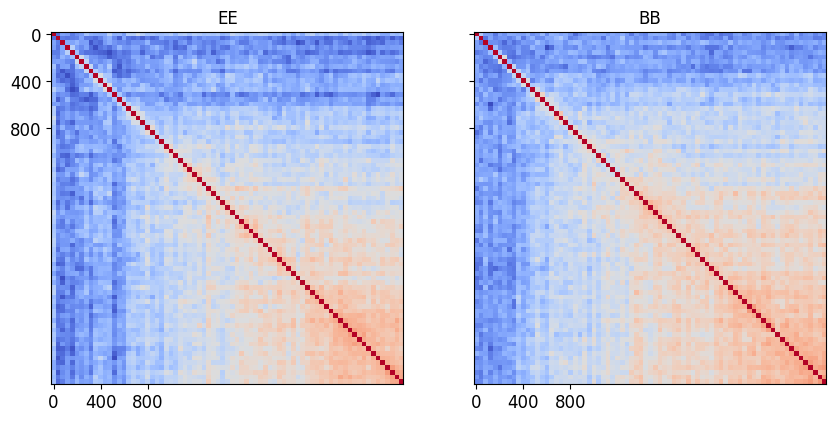

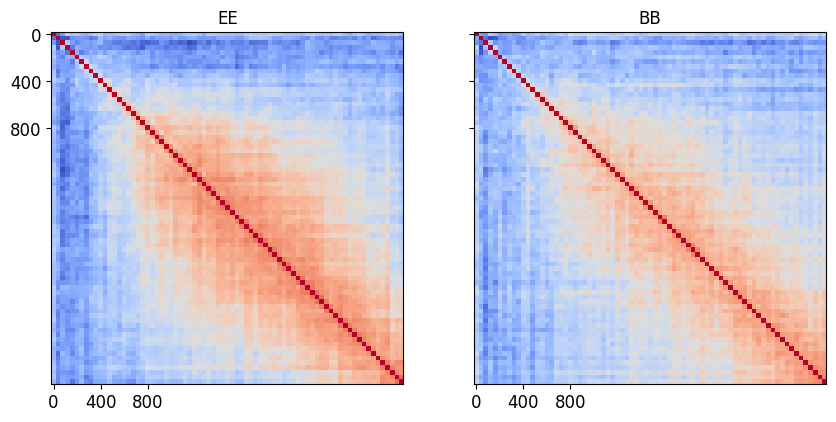

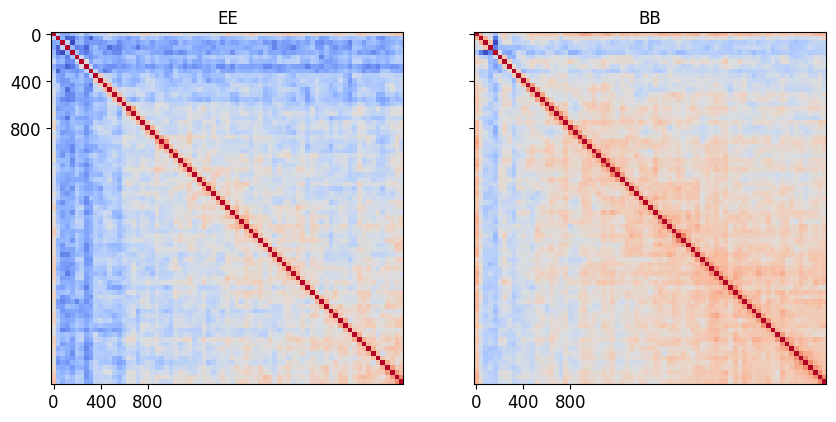

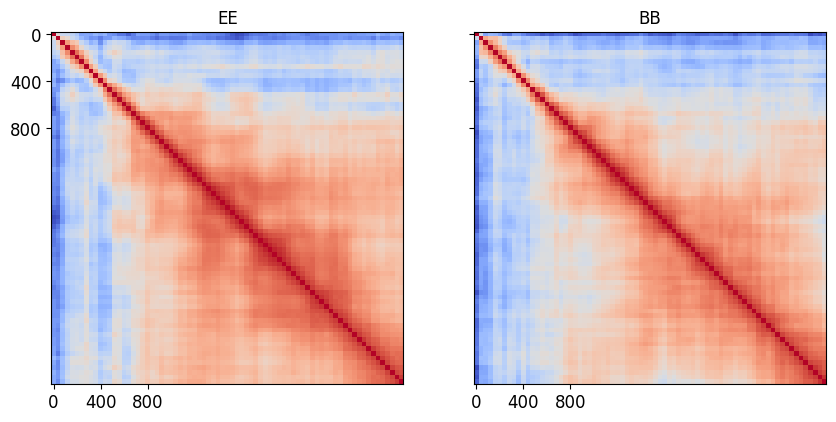

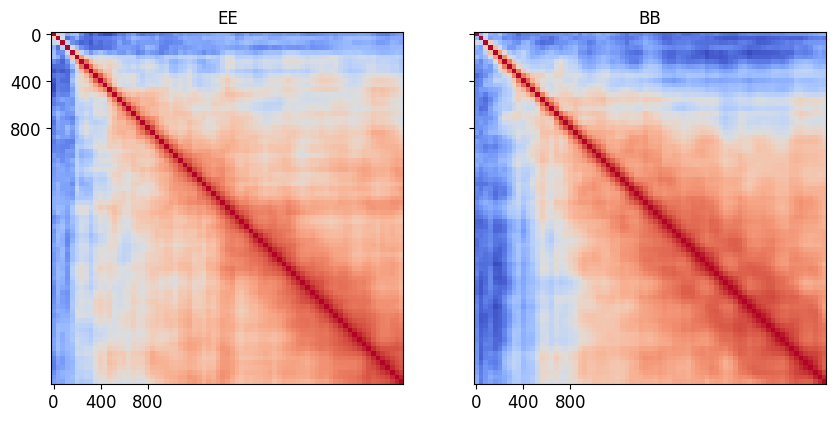

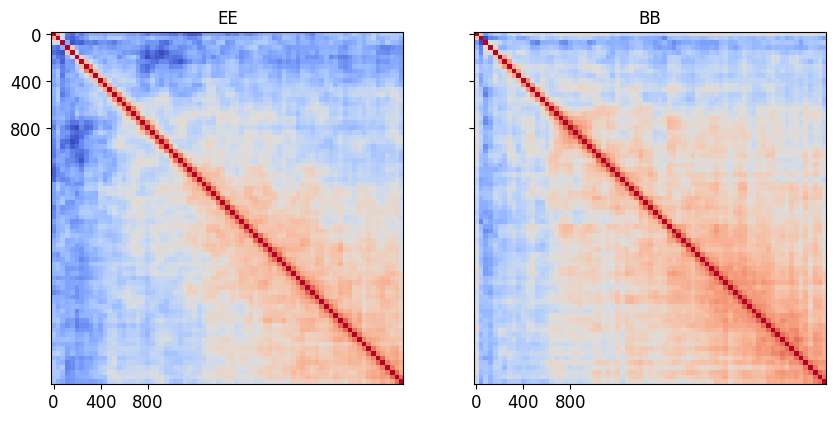

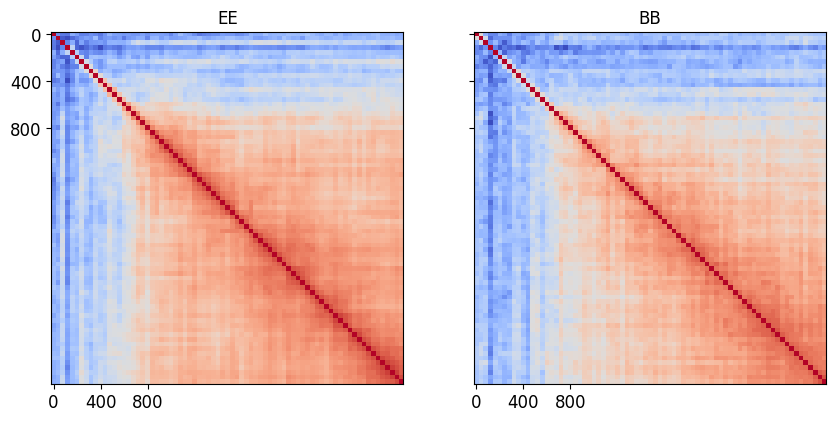

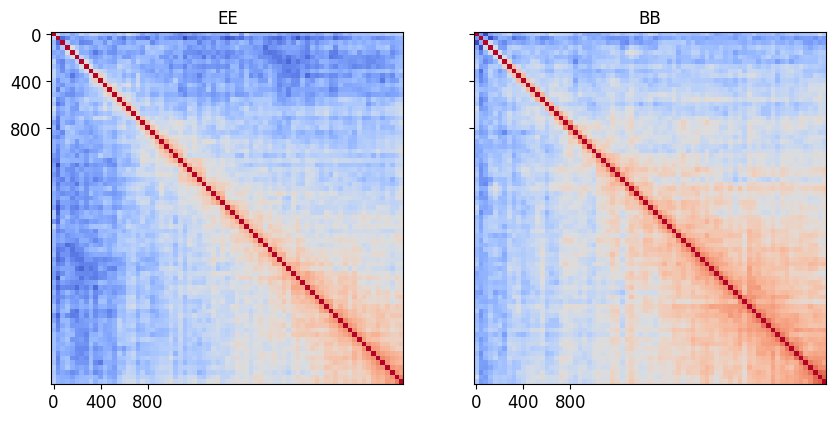

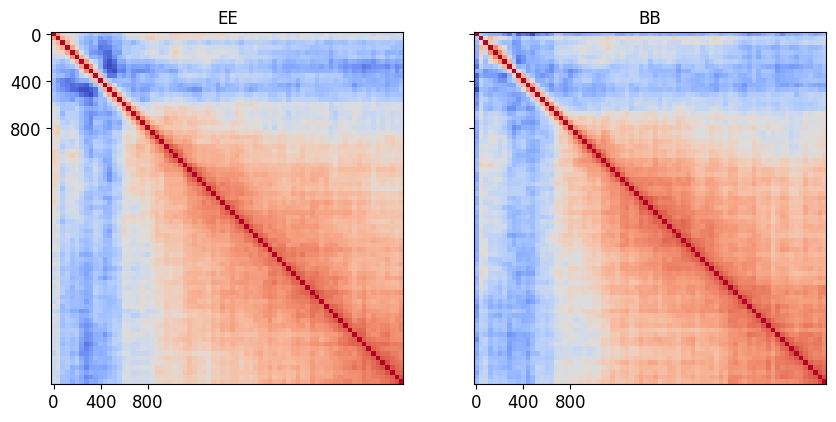

In [5]:
cls_all = np.load('test_all_cls.npy')
index = np.arange(1, 174, 20)
for i in range(9):
    # print(i, lonlat['lon'][index[i]], lonlat['lat'][index[i]])
    # plt.figure()
    get_cov(cls_all[i], lmax = 3000)
    

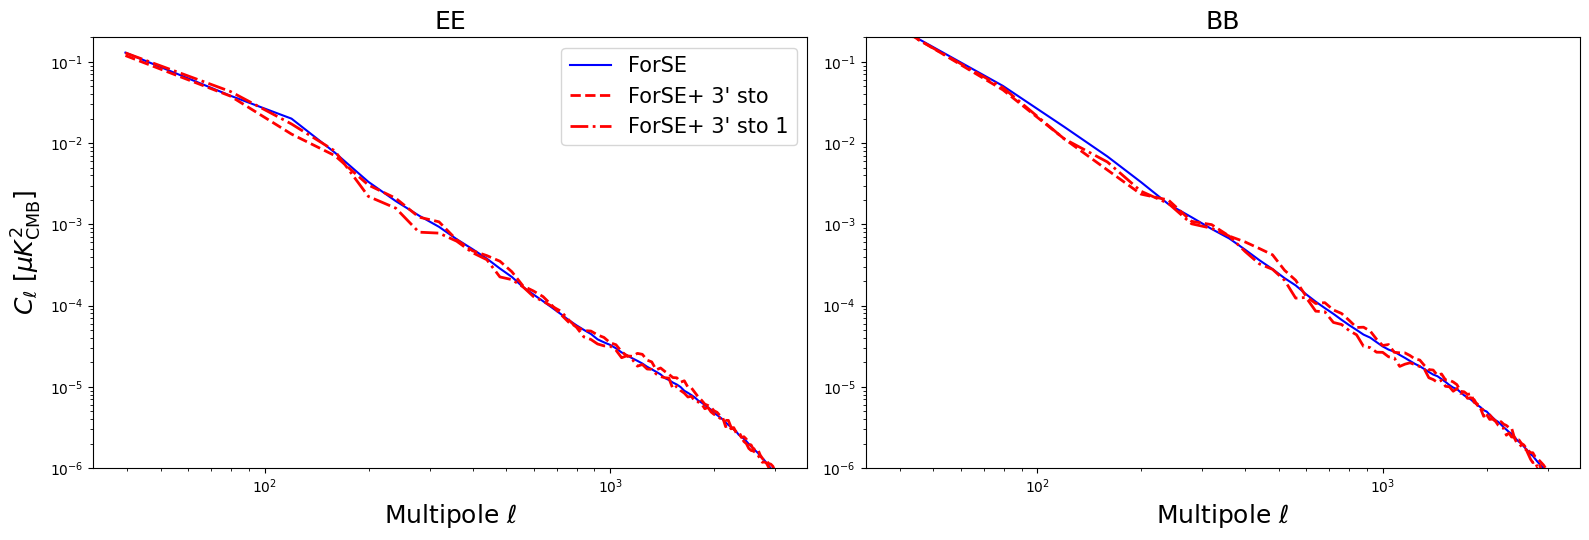

In [48]:
l0_bins = np.arange(20, 3000, 40); lf_bins = np.arange(20, 3000, 40)+39
b = nmt.NmtBinFlat(l0_bins, lf_bins)
ells_uncoupled = b.get_effective_ells()

mean_cl = np.mean(cls_all, axis = 1)
std_cl = np.std(cls_all, axis = 1)

fig, axes = plt.subplots(1,2, figsize=(16, 5.5)) 

for j in range(0,1):
                     
    names = ['EE', 'BB']
    for i in range(2):
        if j == 0:
            # axes[i].loglog(ells_uncoupled_80, cls_80[i*3],  '--', lw=2, color='Black', alpha=0.5, label = 'GNILC 80\'')
            # axes[i].loglog(ells_uncoupled, cls_3_deter[i*3],  '--', lw=2, color='Black', alpha=1, label = 'ForSE+ 3\' deter')
            axes[i].set_ylim(1e-6, 2e-1)
            axes[i].set_xticks([40, 100, 400, 1000])
            axes[i].set_title('%s'%names[i], fontsize=18)
            axes[i].set_xlabel(r'Multipole $\ell$', fontsize=18)

            if i == 0:
                axes[i].set_ylabel(r'$C_{\ell}$ [$\mu K_{\mathrm{CMB}}^2$]', fontsize=18)  
        
        axes[i].loglog(ells_uncoupled, mean_cl[j][i*3], label='ForSE', color = 'blue')
        axes[i].loglog(ells_uncoupled, cls_all[j][10][i*3],  '--', lw=2, color='red', alpha=1, label = 'ForSE+ 3\' sto')
        axes[i].loglog(ells_uncoupled, cls_all[j][9][i*3],  '-.', lw=2, color='red', alpha=1, label = 'ForSE+ 3\' sto 1')
        axes[i].set_yscale('log')
        axes[i].set_xscale('log')

axes[0].legend(fontsize = 15)
# axes[1].legend(fontsize = 15)
plt.tight_layout() 
# fig.suptitle('PS mean and std from SNR 10, 1, 0.1 and noise', fontsize = 18)
# plt.savefig('figs/paper_figures/random_cls_patch_snr_1.pdf', format = 'pdf',  bbox_inches='tight')

100 75


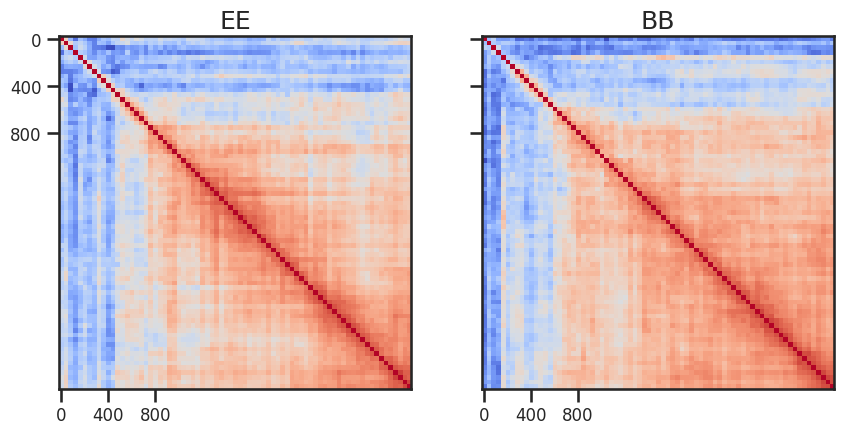

In [60]:
recom_3 = recompose_class.recom(npix = 1280, pixelsize = 0.9375, overlap = 2, nside = 4096, 
                 apodization_file = '/pscratch/sd/j/jianyao/mask_1280*1280.npy', 
                 xy_inds_file = '/pscratch/sd/j/jianyao/forse_recompose/recompose_xinds_yinds_4096', 
                 index_sphere_file = '/pscratch/sd/j/jianyao/forse_recompose/recompose_footprint_healpix_index_4096', verbose=False)

    
ss_norm_dir = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p2_random_3amin_renorm_from_random_12amin_renorm/'
ss_recom_dir = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p2_full_3amin_EB_fixed_renorm_from_random_12amin_renorm/'
   
save_dir = ss_norm_dir + 'Random_3amin_from_12amin_snr_1/'
save_full_dir = ss_recom_dir + 'Random_3amin_1_output_extended_full/'
if not os.path.exists(save_full_dir):
    os.makedirs(save_full_dir)

for i in range(100):
    if i%50 == 0:
        print(i)

    save_Q = save_dir + 'NN_out_Q_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(i)
    save_U = save_dir + 'NN_out_U_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(i)

    full_Q = recom_3.recompose_fast(save_Q)
    full_U = recom_3.recompose_fast(save_U)        

    save_full_Q = save_full_dir + 'Random_3amin_%s_testing_data_Q_full_%03d.fits'%(1, i)
    save_full_U = save_full_dir + 'Random_3amin_%s_testing_data_U_full_%03d.fits'%(1, i)

    maps_3amin = utility.correct_EB(full_Q, full_U)

    hp.write_map(save_full_Q, maps_3amin[0], overwrite=True)
    hp.write_map(save_full_U, maps_3amin[1], overwrite=True)

### test for one sub-patch

In [ ]:
def get_cls_patches(test_forse, reso = '12', j_range = np.arange(3), i_range = np.arange(100), only_one = True, patch_id = 33):
    
    s = time.time()
    cls_NN = [];
    if only_one:
        N = 0
    else:
        N = 33
    if reso == '3':
        lmax = 3000
        w22_file = "w22_flat_1280_1280_lmax3000_no_purifyB.fits"
        mask_path = './src/ForSEplus/mask_1280x1280.npy'
    
        for j in j_range:
            cls_NN_j = []
            
            for i in i_range:

                data_Q, data_U = get_3amin_20by20(test_forse, i, only_one, patch_id)

                ells_uncoupled, cls_NN_i = flat_ps(maps = [data_Q[N], data_U[N]], lmax = lmax, w22_file = w22_file, mask_path = mask_path)
                cls_NN_j.append(cls_NN_i)
                
                # if i != 0 and i%100 == 0:
                #     e = time.time()
                #     print('Averate time cost for each realization is %s mins'%((e-s)/60/(i+1)))

            cls_NN.append(cls_NN_j)
    return cls_NN

In [63]:
NN_norm_3Q, NN_norm_3U = get_3amin_20by20(test_forse, index = 10, only_one = True, patch_id = 161, validate = False, test = True)

In [31]:
output_test = get_3amin_20by20(test_forse, index = 10, only_one = False, patch_id = False, validate = True, test = False)

In [46]:
dir_name = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p2_random_3amin_renorm_from_random_12amin_renorm/Random_3amin_from_12amin_snr_1/'
map_Q = np.load(dir_name + 'NN_out_Q_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%10)

In [1]:
# fig, axes = plt.subplots(7, 7, figsize = (10, 10))
# k = 0
# for i in range(7):
#     for j in range(7):
#         axes[i , j].imshow(NN_norm_3Q[0][k], vmin = -30, vmax = 30)
#         axes[i , j].set_axis_off()
#         k += 1

# plt.subplots_adjust(wspace=0.1, hspace=0.1)

In [40]:
NN_12amin_Q = np.load(dir_name_12 + 'Random_1_testing_data_Nico_T12amin_1_Q80amin_renormalized_%03d.npy'%10)


In [49]:
NN_3_det = np.load('/pscratch/sd/j/jianyao/forse_output/revised_3amin_input/FIXMF/NN_out_Q_3amin_from_20amin_physical_units_20x20_1280_norm_with_13amin_FIXMF.npy')

In [2]:
# fig, axes = plt.subplots(7, 7, figsize = (10, 10))
# k = 0
# for i in range(7):
#     for j in range(7):
#         axes[i , j].imshow(NN_norm_3Q[0][k], vmin = -50, vmax = 50)
#         axes[i , j].set_axis_off()
#         k += 1

# plt.subplots_adjust(wspace=0.1, hspace=0.1)

In [69]:
NN_norm_3Q.shape

(1, 49, 320, 320)

In [ ]:
lmax = 3000
w22_file = "w22_flat_320_320_5deg_lmax3000_no_purifyB.fits"
mask_path = './src/ForSEplus/mask_320x320.npy'

          
cls_NN_j1 = []
cls_NN_j2 = []  
cls_NN_j3 = []  
for i in range(100):
    NN_norm_3Q, NN_norm_3U = get_3amin_20by20(test_forse, index = 10, only_one = True, patch_id = 161, validate = False, test = True, model=3)
    ells_uncoupled, cls_NN_1 = flat_ps(maps = [NN_norm_3Q[0][17], NN_norm_3U[0][17]], lmax = lmax, w22_file = w22_file, mask_path = mask_path, side_length=5)
    ells_uncoupled, cls_NN_2 = flat_ps(maps = [NN_norm_3Q[0][38], NN_norm_3U[0][38]], lmax = lmax, w22_file = w22_file, mask_path = mask_path, side_length=5)
    ells_uncoupled, cls_NN_3 = flat_ps(maps = [NN_norm_3Q[0][10], NN_norm_3U[0][10]], lmax = lmax, w22_file = w22_file, mask_path = mask_path, side_length=5)
    cls_NN_j1.append(cls_NN_1)
    cls_NN_j2.append(cls_NN_2)
    cls_NN_j3.append(cls_NN_3)

cls_NN_using_12 = [] 
cls_NN_using_12.append([cls_NN_j1])
cls_NN_using_12.append([cls_NN_j2])
cls_NN_using_12.append([cls_NN_j3])

In [3]:
# for i in range(3):
#     get_cov(cls_NN[i], lmax = 1000)

In [4]:
# for i in range(3):
    # get_cov(cls_NN[i], lmax = 3000)

In [5]:
# for i in range(3):
#     get_cov(cls_NN_using_12[i], lmax = 3000)

### validate

In [8]:
from pathlib import Path
import healpy as hp
import pysm3
import pysm3.units as u

In [15]:
save_dir = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p2_random_3amin_renorm_from_random_12amin_renorm/Random_3amin_from_12amin_snr_1/'
file_name_Q = 'NN_out_Q_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(99)
file_name_U = 'NN_out_U_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(99)

In [9]:
def validate_output(output3):
    
    # output3 = at3.post_training(NNout_Q, NNout_U, ss_I, Ls_13aminQ, Ls_13aminU, MF = True)
    # # output3 = at3.post_training(NNout_Q, NNout_U, ss_I, maps_sub_20Q, maps_sub_20U, MF = True)
    # output3.normalization(gauss_ss_ps_3, gauss_ss_mean_std_3, mask_path = './src/ForSEplus/mask_320x320.npy')
    # output3.combine_to_20by20(output3.NNmapQ_corr, output3.NNmapU_corr, maps = 'ss_norm')
    # output3.combine_to_20by20(NNout_Q.reshape(174,49,320,320), NNout_U.reshape(174,49,320,320), maps = 'ss')
    test = output3.plot_MF(patch_N = 3, savedir=False)

    recom_3 = recompose_class.recom(npix = 1280, pixelsize = 0.9375, overlap = 2, nside = 4096, 
                     apodization_file = '/pscratch/sd/j/jianyao/mask_1280*1280.npy', 
                     xy_inds_file = '/pscratch/sd/j/jianyao/forse_recompose/recompose_xinds_yinds_4096', 
                     index_sphere_file = '/pscratch/sd/j/jianyao/forse_recompose/recompose_footprint_healpix_index_4096', verbose=False)

    print('3amin: reproject to full sky ...')
    full_Q = recom_3.recompose_fast(output3.NN_20by20_Q_norm)
    full_U = recom_3.recompose_fast(output3.NN_20by20_U_norm) 

    maps_3amin = utility.correct_EB(full_Q, full_U)

    maps_80amin = hp.read_map('/pscratch/sd/j/jianyao/COM_CompMap_IQU-thermaldust-gnilc-unires_2048_R3.00.fits', field = None)[1:3]*1e6 
    poltens = hp.ud_grade(hp.read_map('/pscratch/sd/j/jianyao/dust_gnilc_varres_pysm_circles_uK_RJ_lmax_6143_nside_2048.fits', field = None)/0.07748637 ,nside_out = 2048)
    # from uK_RJ to uK_CMB
    poltens_3amin = hp.smoothing(poltens, fwhm=3/60/180*np.pi)
    # poltens_3amin =  np.array((hp.ud_grade(poltens_3amin[1], nside_out = 2048), hp.ud_grade(poltens_3amin[2], nside_out = 2048)))

    cls_pt = np.load('/global/homes/j/jianyao/Small_Scale_Foreground/cls_poltens_maps_0320.npz', allow_pickle=True)
    cls_full_pt = cls_pt['cls_full_pt'].item()
    cls_80p_pt = cls_pt['cls_80p_pt'].item()
    cls_40p_pt = cls_pt['cls_40p_pt'].item()

    planck_mask = hp.read_map('/pscratch/sd/j/jianyao/HFI_Mask_GalPlane-apo2_2048_R2.00.fits', field = None)
    bkmaskfile = Path('/pscratch/sd/j/jianyao/bk14_mask_gal_n0512.fits')
    maskbk= hp.read_map(bkmaskfile , verbose=False)
    idx = np.where((maskbk < 0) | (~np.isfinite(maskbk)))
    maskbk [idx] = 0

    check_3 = validation_class.validate_3amin(maps_80amin, maps_3amin, poltens_3amin[1:]) # maps only contain QU 
    check_3.cls_check_sky(maps_3amin, planck_mask, lmax = 4096, color = 'r', label = 'ForSE-3\'', cls_pt = [cls_full_pt, cls_80p_pt, cls_40p_pt])
    check_3.show_fullsky()
    check_3.show_patch()

    cls_all_patches = check_3.cls_check_patch(maskbk)

In [55]:
NN_12_sto = np.load(dir_name_12 + 'Random_1_testing_data_Nico_T12amin_1_Q80amin_renormalized_%03d.npy'%10)

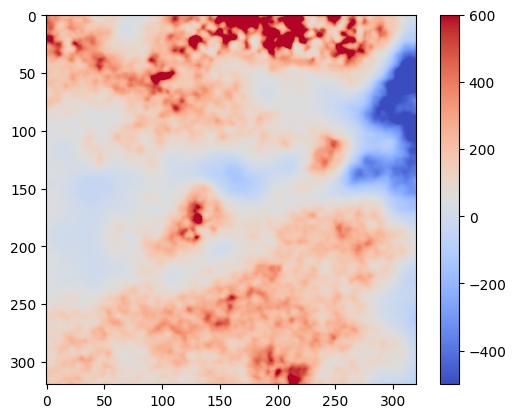

In [57]:
plt.imshow(NN_12_sto[66], vmin = -500, vmax = 600)
plt.colorbar()

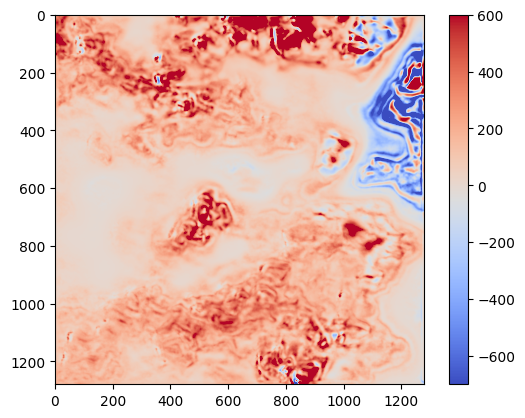

In [59]:
plt.imshow(output_test.NN_20by20_Q_norm[66], vmin = -700, vmax = 600)
plt.colorbar()

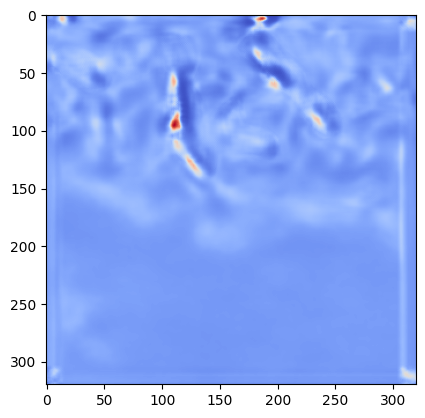

In [48]:
plt.imshow(output_test.NNout_Q[66][4])
# plt.colorbar()

3amin: Initializing the re-projection ...
3amin: reproject to full sky ...
weights loaded from /pscratch/sd/j/jianyao/w22_2048_80_sky_lmax_4096_nbins_40.fits
weights loaded from /pscratch/sd/j/jianyao/w22_2048_40_sky_lmax_4096_nbins_40.fits
weights loaded from /pscratch/sd/j/jianyao/w22_512_bicep.fits
weights loaded from /pscratch/sd/j/jianyao/w22_512_bicep.fits
weights loaded from /pscratch/sd/j/jianyao/w22_512_bicep.fits


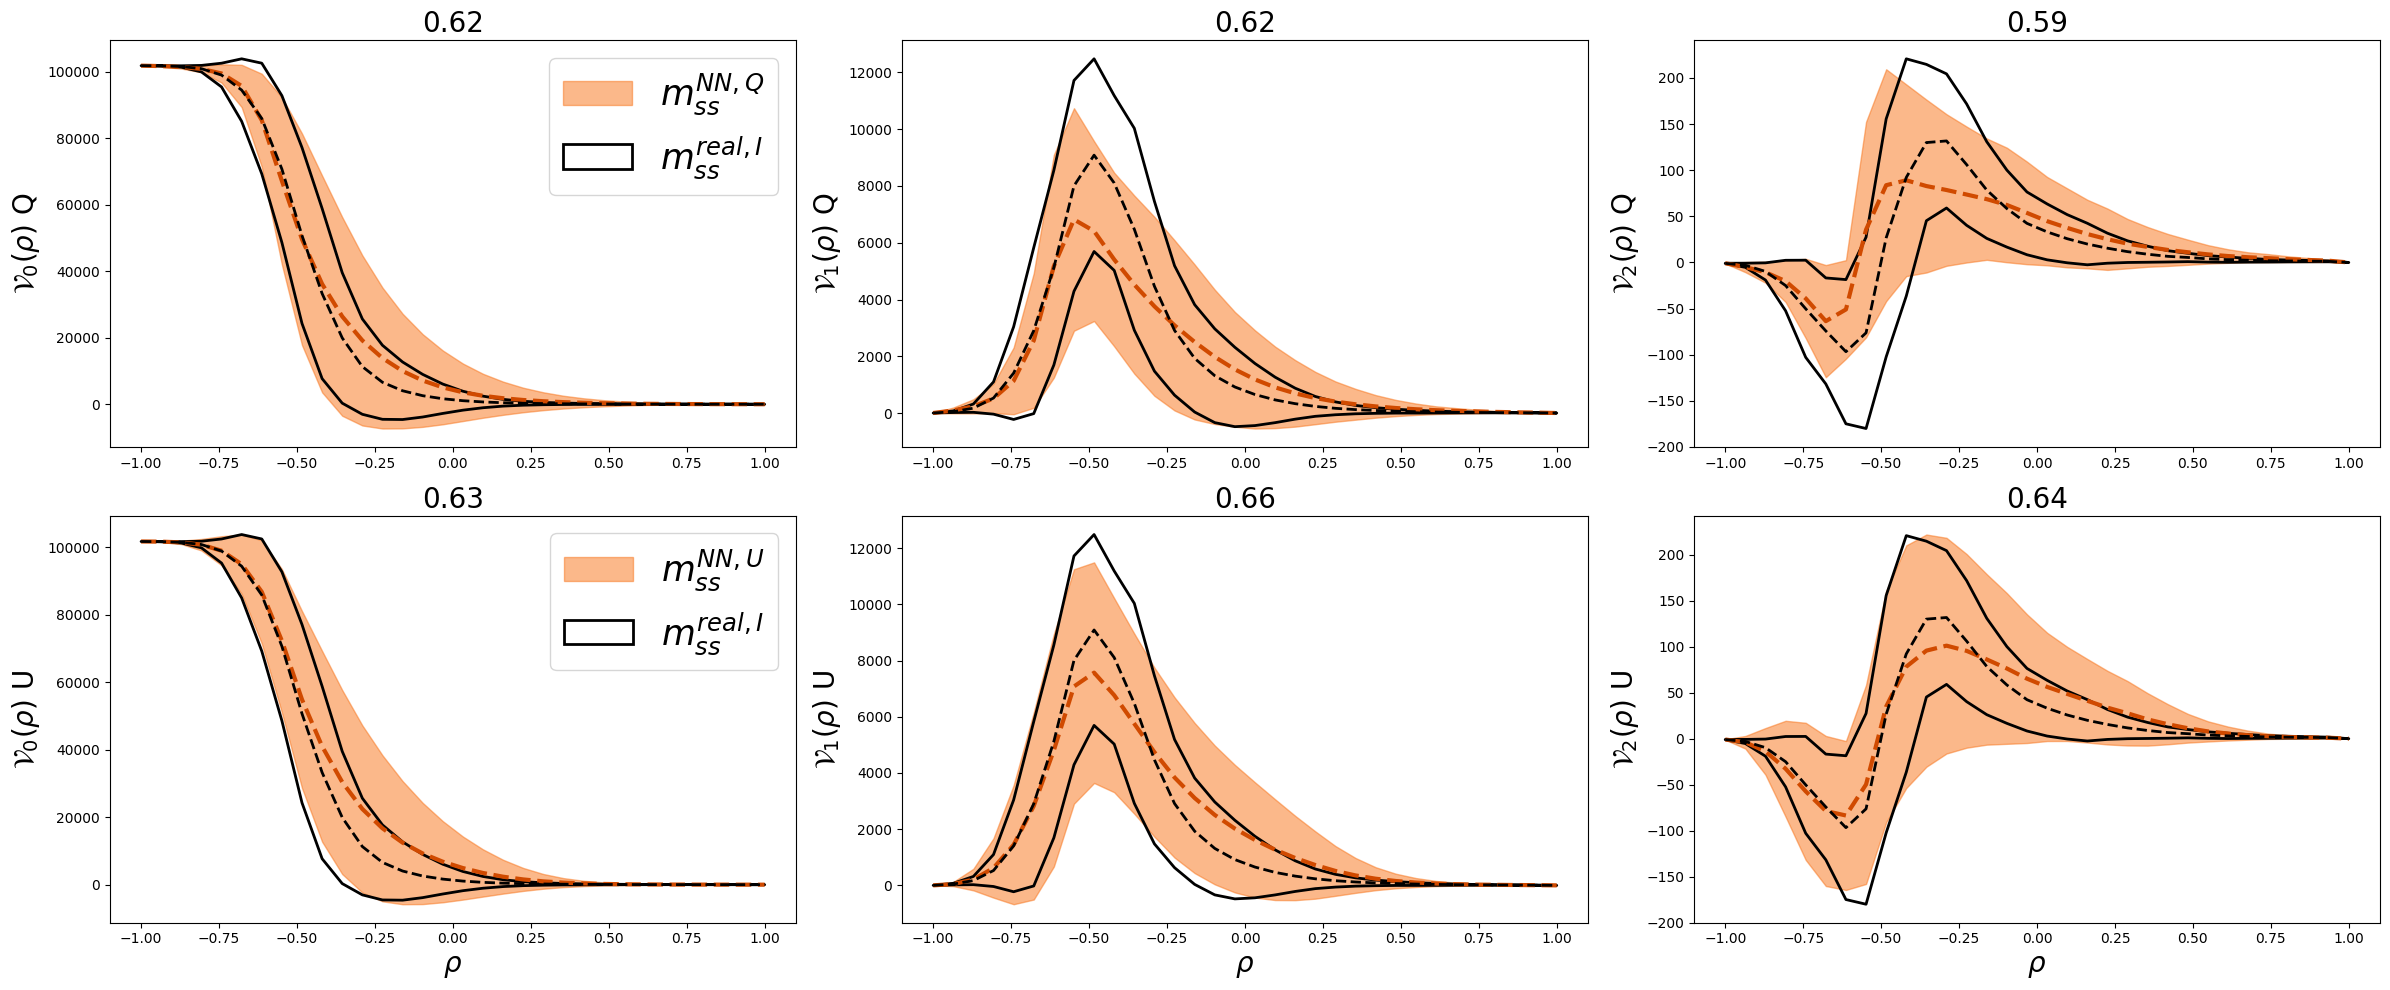

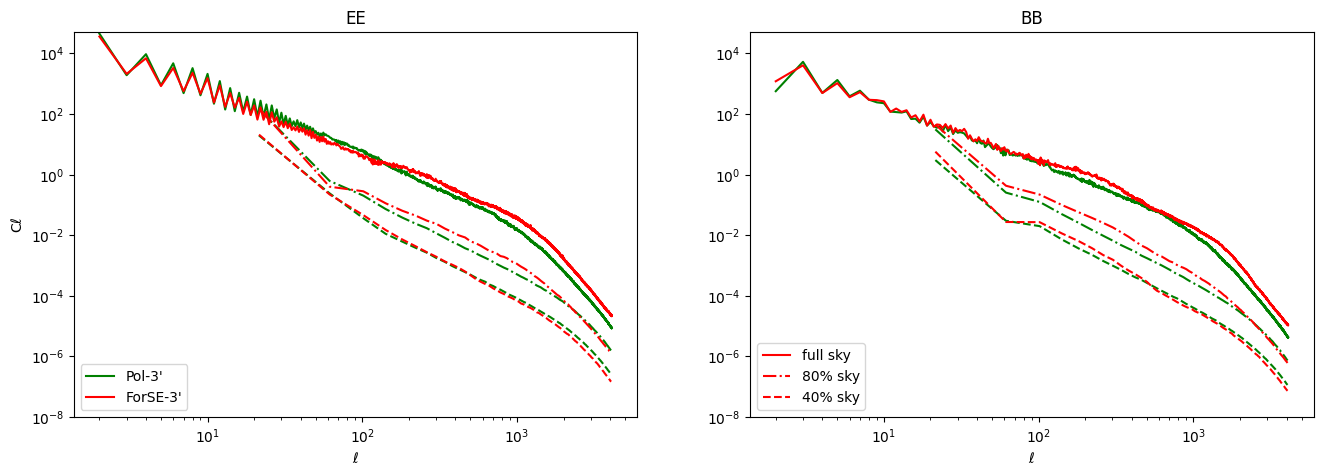

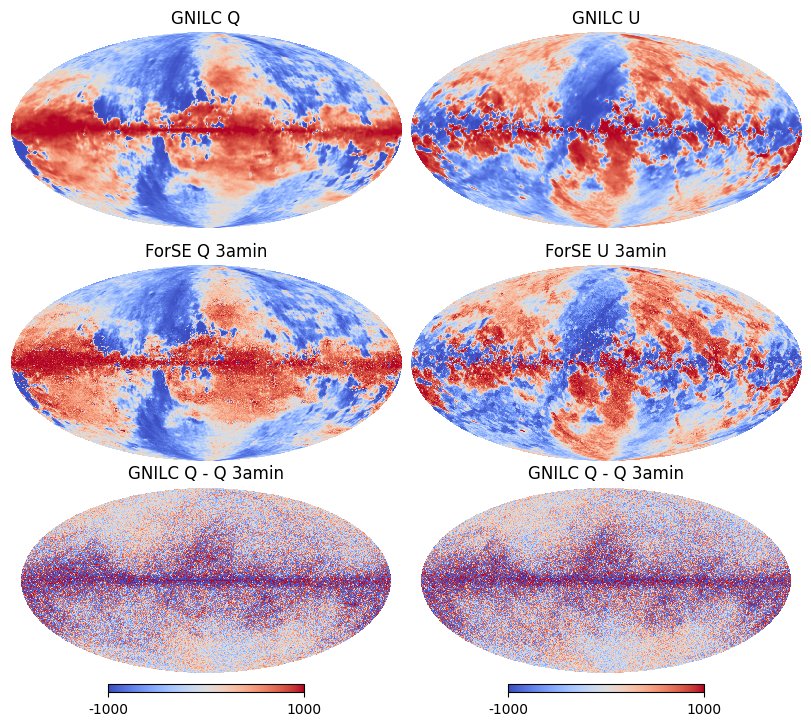

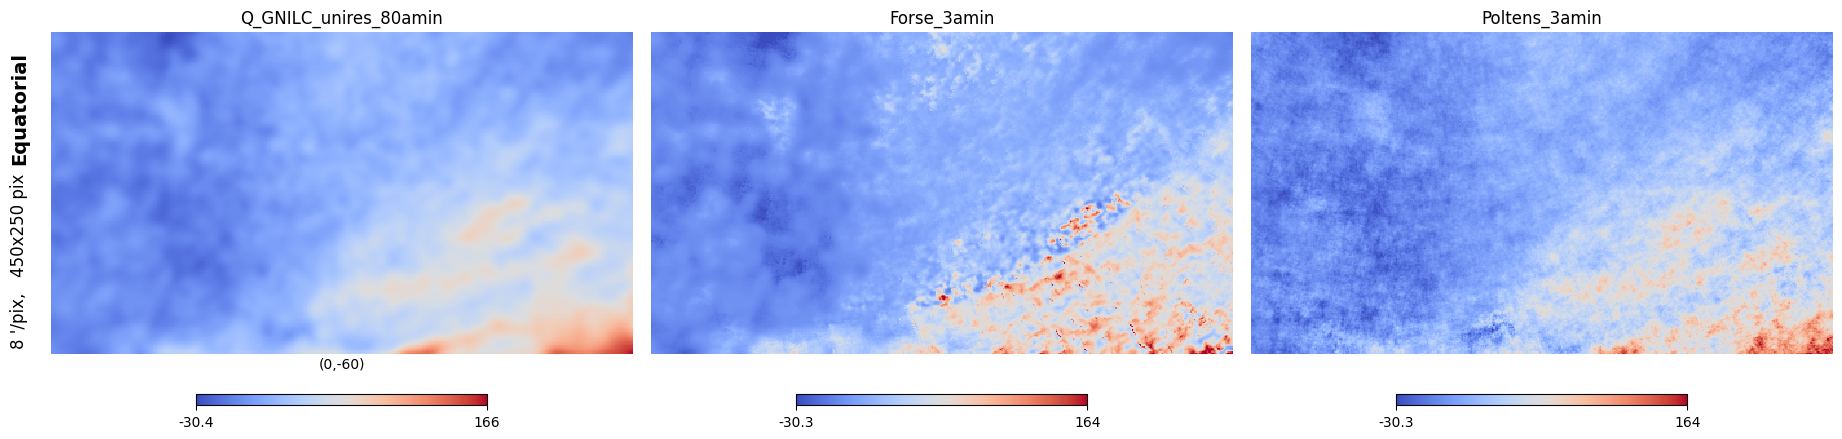

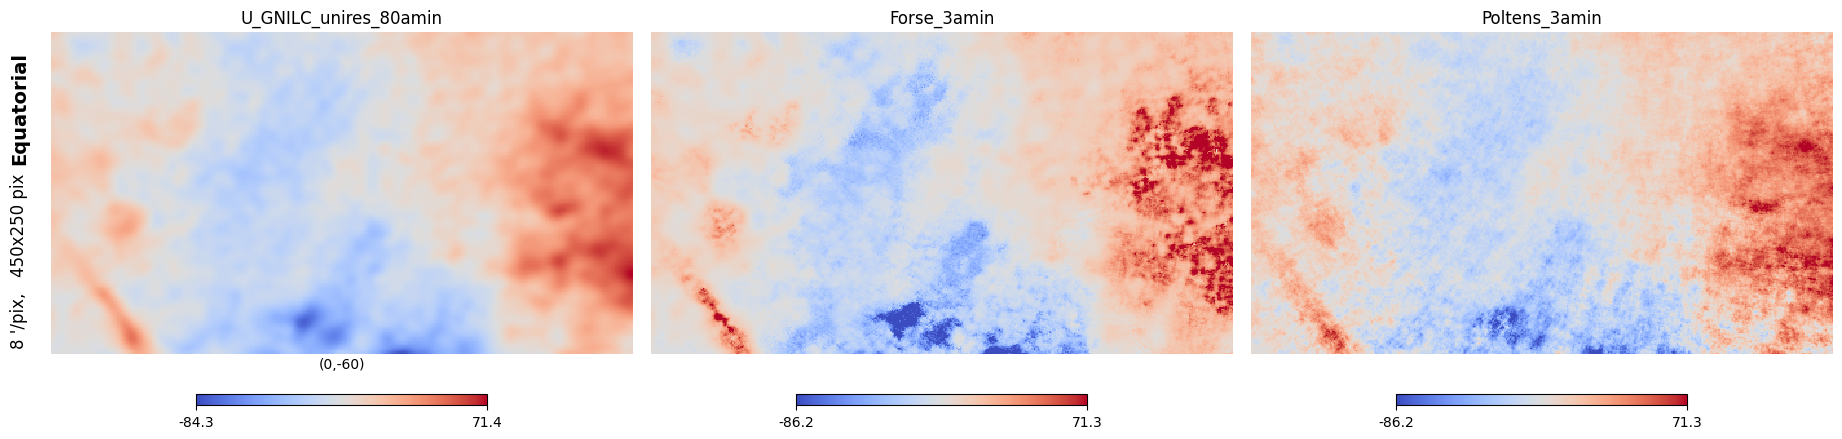

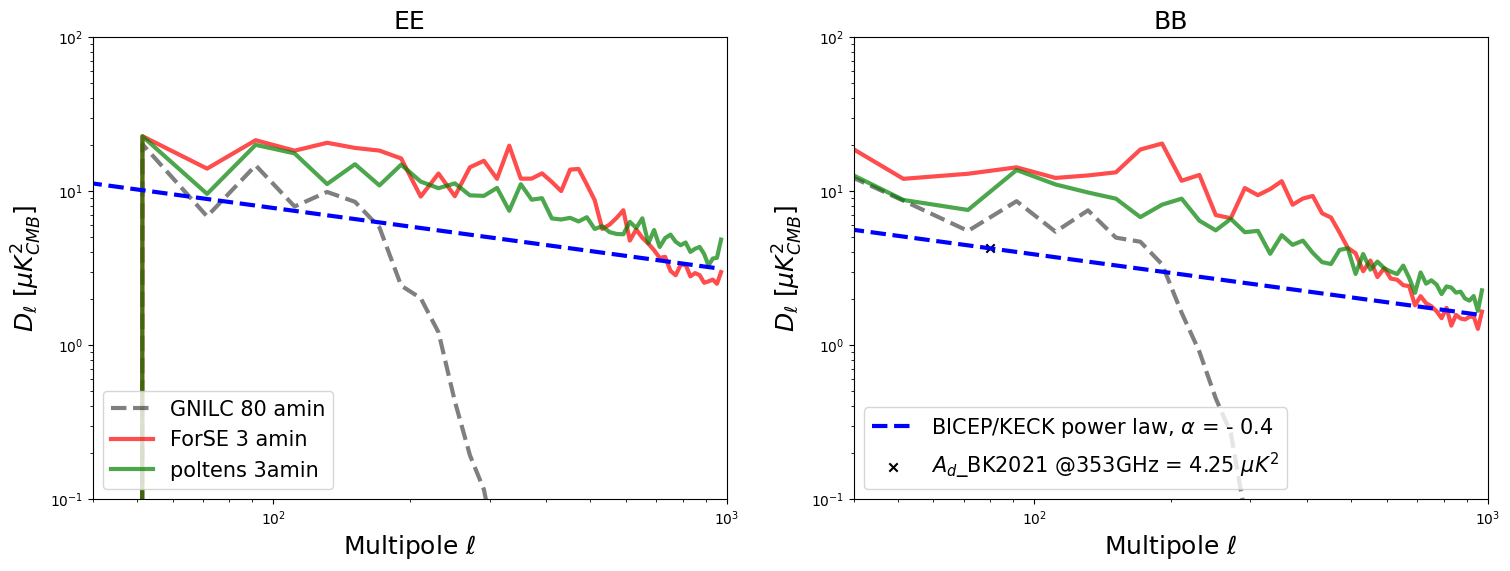

In [10]:
output_test = get_3amin_20by20(test_forse, index = 10, only_one = False, patch_id = False, validate = True)
validate_output(output_test)

## original 

In [13]:
model_dir_Q = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_Q_jupyter_revised/'
model_dir_U = '/pscratch/sd/j/jianyao/forse_output/Random_3_arcmin_348_models_MY_lr_5e-5_U_jupyter_revised/'
# ss_norm_dir_3 = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p1_random_3amin_renorm_from_deter_12amin_renorm/'
ss_norm_dir_3 = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p3_random_3amin_renorm_from_random_12amin_renorm_no_noise/'
save_dir = ss_norm_dir_3 + 'Random_3amin_from_12amin_snr_1/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)   
    
dir_name_12 = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/2_random_12amin_renormalized/New_realizations_1/'    
s = time.time() 
for i in range(1):
    
    # noise_1 = np.random.uniform(-1, 1, (174*49, 320, 320))
    noise_1 = None
    
    NN_12amin_Q = np.load(dir_name_12 + 'Random_1_testing_data_Nico_T12amin_1_Q80amin_renormalized_%03d.npy'%i)
    NN_12amin_U = np.load(dir_name_12 + 'Random_1_testing_data_Nico_T12amin_1_U80amin_renormalized_%03d.npy'%i)
    
    Ls_13aminQ, Ls_13aminU = utility.from_12to13(NN_12amin_Q, NN_12amin_U) # to normalize the output from 3amin
    
    Ls_20aminQ, Ls_20aminU = utility.from_12to20(NN_12amin_Q, NN_12amin_U, random_noise=noise_1)     
    
#     Ls_20aminQ = maps_sub_20Q + noise_1
#     Ls_20aminU = maps_sub_20U + noise_1 
    
    Ls_rescaled_Q, Ls_rescaled_U = rescale_input(Ls_20aminQ), rescale_input(Ls_20aminU)
    
    del Ls_20aminQ, Ls_20aminU, noise_1
    
    test_forse.checkpoint.restore(model_dir_Q + 'training_checkpoints/ckpt-%s'%212)
    NNout_Q = test_forse.checkpoint.generator.predict(Ls_rescaled_Q)

    test_forse.checkpoint.restore(model_dir_U + 'training_checkpoints/ckpt-%s'%175)
    NNout_U = test_forse.checkpoint.generator.predict(Ls_rescaled_U)

    file_name_Q = 'NN_out_Q_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(i)
    file_name_U = 'NN_out_U_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(i)
    
    # print('3amin: renormalize patches ...')
    # if i == 0:
    output3 = at3.post_training(NNout_Q, NNout_U, ss_I, Ls_13aminQ, Ls_13aminU, MF = False)
    # else:
    output3.NNout_Q = NNout_Q.reshape(174,49,320,320)
    output3.NNout_U = NNout_U.reshape(174,49,320,320);
    
    # del Ls_13aminQ, Ls_13aminU, NNout_Q, NNout_U
    
    output3.normalization(gauss_ss_ps_3, gauss_ss_mean_std_3, mask_path = './src/ForSEplus/mask_320x320.npy')
    
    # output3.combine_to_20by20(output3.NNmapQ_corr, output3.NNmapU_corr, maps = 'ss_norm')
    output3.combine_to_20by20(output3.NNmapQ_corr, output3.NNmapU_corr, maps = 'ss_norm', save_dir=[save_dir + file_name_Q, save_dir + file_name_U])
    # output3.combine_to_20by20(NNout_Q.reshape(174,49,320,320), NNout_U.reshape(174,49,320,320), maps = 'ss')
    
    del output3
    if i% 10 == 0 and i > 0:
        e = time.time()
        print('Average Time cost is %s mins'%((e - s)/60/i))

In [8]:
# print('3amin: renormalize patches ...')
# output3 = at3.post_training(NNout_Q, NNout_U, ss_I, Ls_13aminQ, Ls_13aminU, MF = True)
# # output3 = at3.post_training(NNout_Q, NNout_U, ss_I, maps_sub_20Q, maps_sub_20U, MF = True)
# output3.normalization(gauss_ss_ps_3, gauss_ss_mean_std_3, mask_path = './src/ForSEplus/mask_320x320.npy')
# output3.combine_to_20by20(output3.NNmapQ_corr, output3.NNmapU_corr, maps = 'ss_norm')
# output3.combine_to_20by20(NNout_Q.reshape(174,49,320,320), NNout_U.reshape(174,49,320,320), maps = 'ss')
# test = output3.plot_MF(patch_N = 3, savedir=False)

In [2]:
save_dir = '/pscratch/sd/j/jianyao/forse_output/Random_training_files/FIX_MF/4p1_random_3amin_renorm_from_random_12amin_renorm/Random_3amin_from_12amin_snr_1/'
file_name_Q = 'NN_out_Q_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(99)
file_name_U = 'NN_out_U_3amin_from_20amin_physical_units_20x20_1280_%03d.npy'%(99)

In [15]:
recom_3 = recompose_class.recom(npix = 1280, pixelsize = 0.9375, overlap = 2, nside = 4096, 
                 apodization_file = '/pscratch/sd/j/jianyao/mask_1280*1280.npy', 
                 xy_inds_file = '/pscratch/sd/j/jianyao/forse_recompose/recompose_xinds_yinds_4096', 
                 index_sphere_file = '/pscratch/sd/j/jianyao/forse_recompose/recompose_footprint_healpix_index_4096', verbose=False)

print('3amin: reproject to full sky ...')
full_Q = recom_3.recompose_fast(output3.NN_20by20_Q_norm)
full_U = recom_3.recompose_fast(output3.NN_20by20_U_norm) 

maps_3amin = utility.correct_EB(full_Q, full_U)

# del output3
# end = time.time()

# print('Time cost %.02f'%((end - start)/60))

3amin: Initializing the re-projection ...
3amin: reproject to full sky ...


In [ ]:
NN_20by20_Q = np.load(save_dir + file_name_Q)
NN_20by20_U = np.load(save_dir + file_name_U)

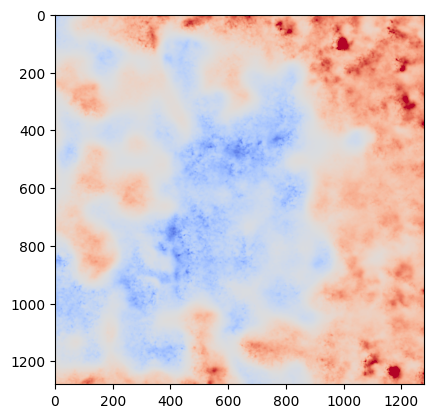

In [17]:
plt.imshow(NN_20by20_Q[33], vmin = -30, vmax = 30)

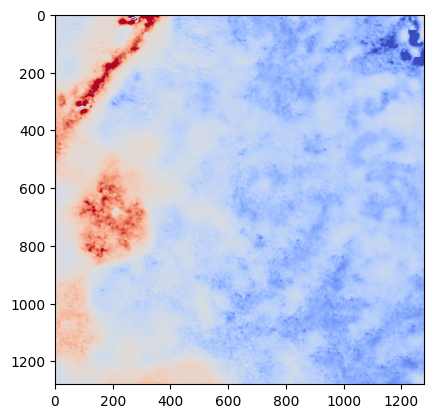

In [20]:
plt.imshow(NN_20by20_U[33], vmin = -60, vmax = 60)

# validation the output of the model

In [16]:
from pathlib import Path
import healpy as hp
import pysm3
import pysm3.units as u

In [17]:
maps_80amin = hp.read_map('/pscratch/sd/j/jianyao/COM_CompMap_IQU-thermaldust-gnilc-unires_2048_R3.00.fits', field = None)[1:3]*1e6 
poltens = hp.ud_grade(hp.read_map('/pscratch/sd/j/jianyao/dust_gnilc_varres_pysm_circles_uK_RJ_lmax_6143_nside_2048.fits', field = None)/0.07748637 ,nside_out = 2048)
# from uK_RJ to uK_CMB
poltens_3amin = hp.smoothing(poltens, fwhm=3/60/180*np.pi)
# poltens_3amin =  np.array((hp.ud_grade(poltens_3amin[1], nside_out = 2048), hp.ud_grade(poltens_3amin[2], nside_out = 2048)))

In [18]:
cls_pt = np.load('/global/homes/j/jianyao/Small_Scale_Foreground/cls_poltens_maps_0320.npz', allow_pickle=True)
cls_full_pt = cls_pt['cls_full_pt'].item()
cls_80p_pt = cls_pt['cls_80p_pt'].item()
cls_40p_pt = cls_pt['cls_40p_pt'].item()

In [7]:
# planck_mask = hp.read_map('/pscratch/sd/j/jianyao/HFI_Mask_GalPlane-apo2_2048_R2.00.fits', field = None)
# bkmaskfile = Path('/pscratch/sd/j/jianyao/bk14_mask_gal_n0512.fits')
# maskbk= hp.read_map(bkmaskfile , verbose=False)
# idx = np.where((maskbk < 0) | (~np.isfinite(maskbk)))
# maskbk [idx] = 0

# check_3 = validation_class.validate_3amin(maps_80amin, maps_3amin, poltens_3amin[1:]) # maps only contain QU 
# check_3.cls_check_sky(maps_3amin, planck_mask, lmax = 4096, color = 'r', label = 'ForSE-3\'', cls_pt = [cls_full_pt, cls_80p_pt, cls_40p_pt])
# check_3.show_fullsky()
# check_3.show_patch()

# cls_all_patches = check_3.cls_check_patch(maskbk)

# load model

In [5]:
from importlib import reload
import forse_plus
reload(forse_plus)

<module 'forse_plus' from '/global/u2/j/jianyao/ForSEplus_github/src/ForSEplus/forse_plus.py'>

In [6]:
from forse_plus import forsev2

In [7]:
data_dir = '/pscratch/sd/j/jianyao/'
test_model = forsev2(data_dir, snr = 1, go_three = False, three_only = False, validation = False, correct_EB=True)

2023-05-23 16:53:50.538623: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 16:53:51.137512: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78944 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:c3:00.0, compute capability: 8.0


In [ ]:
data_rev = test_model.run()

12amin: Start!
12amin: Generating input random noise with model SNR = 1...
12amin Generating patches...


2023-05-23 16:55:13.070462: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-05-23 16:55:14.207319: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8302


12amin: Renormalize patches...
12amin: Initializing the re-projection...
12amin: reproject to full sky ...
12amin: Complete the reprojection!
Reprojecting to full sky takes 3.01 seconds
12amin: Complete the reprojection!
Reprojecting to full sky takes 2.88 seconds
12amin: correct the E/B ratio


In [10]:
data_rev.shape

(1, 2, 50331648)

In [6]:
del data_rev

In [41]:
from utility import correct_EB
import time

In [42]:
s = time.time()
temp = correct_EB(test_model.maps_12amin[0], test_model.maps_12amin[1])
e = time.time()

print((e-s)/60.0)

3.764796872933706


In [39]:
test_model.maps_12amin.shape

(2, 50331648)

time cost of 2 cores

12amin: Start!
12amin: Generating input random noise with model SNR = 1...
12amin Generating patches...
12amin: Renormalize patches...
12amin: Initializing the re-projection...
12amin: reproject to full sky ...
12amin: Complete the reprojection!
Reprojecting to full sky takes 3.28 seconds
12amin: Complete the reprojection!
Reprojecting to full sky takes 3.31 seconds
12amin: Finishing
Time cost to 12amin is: 0.46 minutes!
3amin: Start!
3amin: Generating patches...
3amin: renormalize patches ...
3amin: Initializing the re-projection ...
3amin: reproject to full sky ...
3amin: Complete the reprojection!
Reprojecting to full sky takes 13.06 seconds
3amin: Complete the reprojection!
Reprojecting to full sky takes 13.37 seconds
Total time cost is: 6.20 minutes!

In [1]:
import os

os.environ[
    "OMP_NUM_THREADS"
] = "64"  # for jupyter.nersc.gov otherwise the notebook only uses 2 cores

import numpy as np

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
